# YouTube Trending Videos Analysis (More Than 40,000 Videos)


## Table of contents
* [Importing some packages](#import)
* [Reading the dataset](#read)
* [Getting a feel of the dataset](#feel)
* [Data cleaning](#clean)
* [Dataset collection years](#coll)
* [Describtion of numerical columns](#descn)
    * [Views histogram](#vh)
    * [Likes histogram](#lh)
    * [Comment count histogram](#ch)
* [Description on non-numerical columns](#descnn)
* [How many trending video titles contain capitalized word?](#cap)
* [Video title lengths](#len)
* [Correlation between dataset variables](#corr)
* [Most common words in video titles](#commti)
* [Which channels have the largest number of trending videos?](#chan)
* [Which video category has the largest number of trending videos?](#cat)
* [Trending videos and their publishing time](#pub)
* [How many trending videos have an error?](#err)
* [How many trending videos have their commets disabled?](#commdis)
* [How many trending videos have their ratings disabled?](#ratdis)
* [How many videos have both comments and ratings disabled?](#commratdis)
* [Conclusions](#conc)



## <a name="import"></a>Importing some packages
Import some necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

The code suppresses warnings to avoid cluttering the output. It also configures the display options for matplotlib to enhance the quality of the displayed figures.






In [4]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

## <a name="read"></a>Reading the dataset
Reading data set from CSV file

In [5]:
df = pd.read_csv("data/USvideos.csv")

The code sets up various configurations and styling options for matplotlib and seaborn to customize the appearance of plots. It defines plot colors, sets the display format for floating-point numbers, adjusts figure and axis properties, and configures font settings.






In [6]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Print the first 5 rows

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Print the information of data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de



## <a name="clean"></a>Data cleaning


The code filters the DataFrame df to show the rows where the "description" column contains missing values (NaN). It then displays the first three rows that meet this condition.






In [9]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


The code fills missing values in the "description" column of DataFrame df with an empty string.






In [10]:
df["description"] = df["description"].fillna(value="")

## <a name="coll"></a>Dataset collection years


The code calculates the count of videos per year based on the "trending_date" column, creates a bar plot to visualize the distribution, and labels the x-axis as "Year" and the y-axis as "No. of videos".






ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

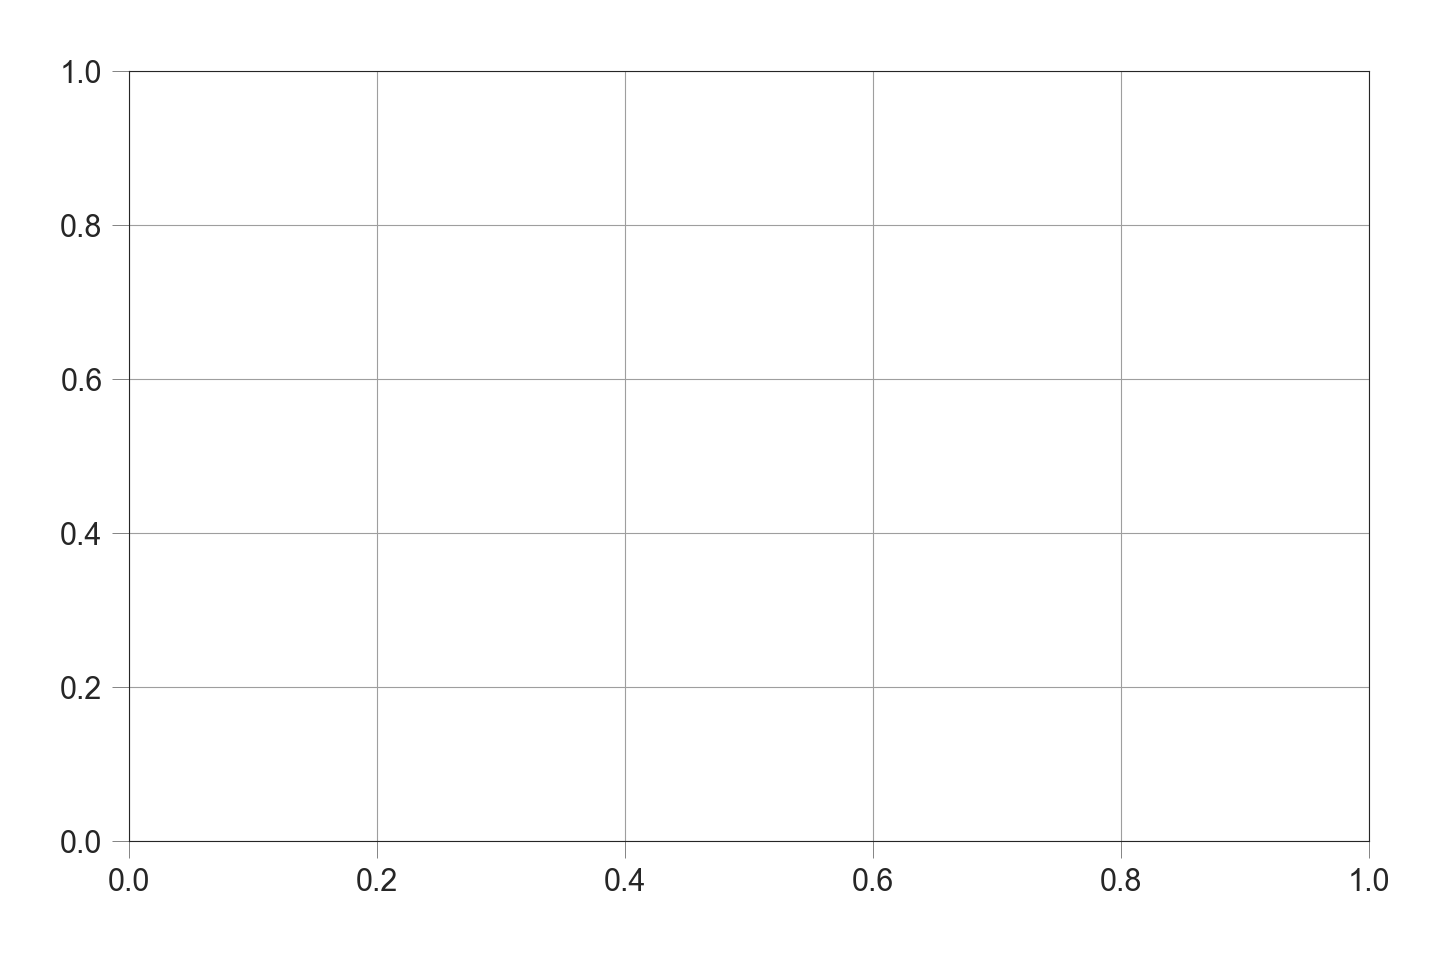

In [12]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf,
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

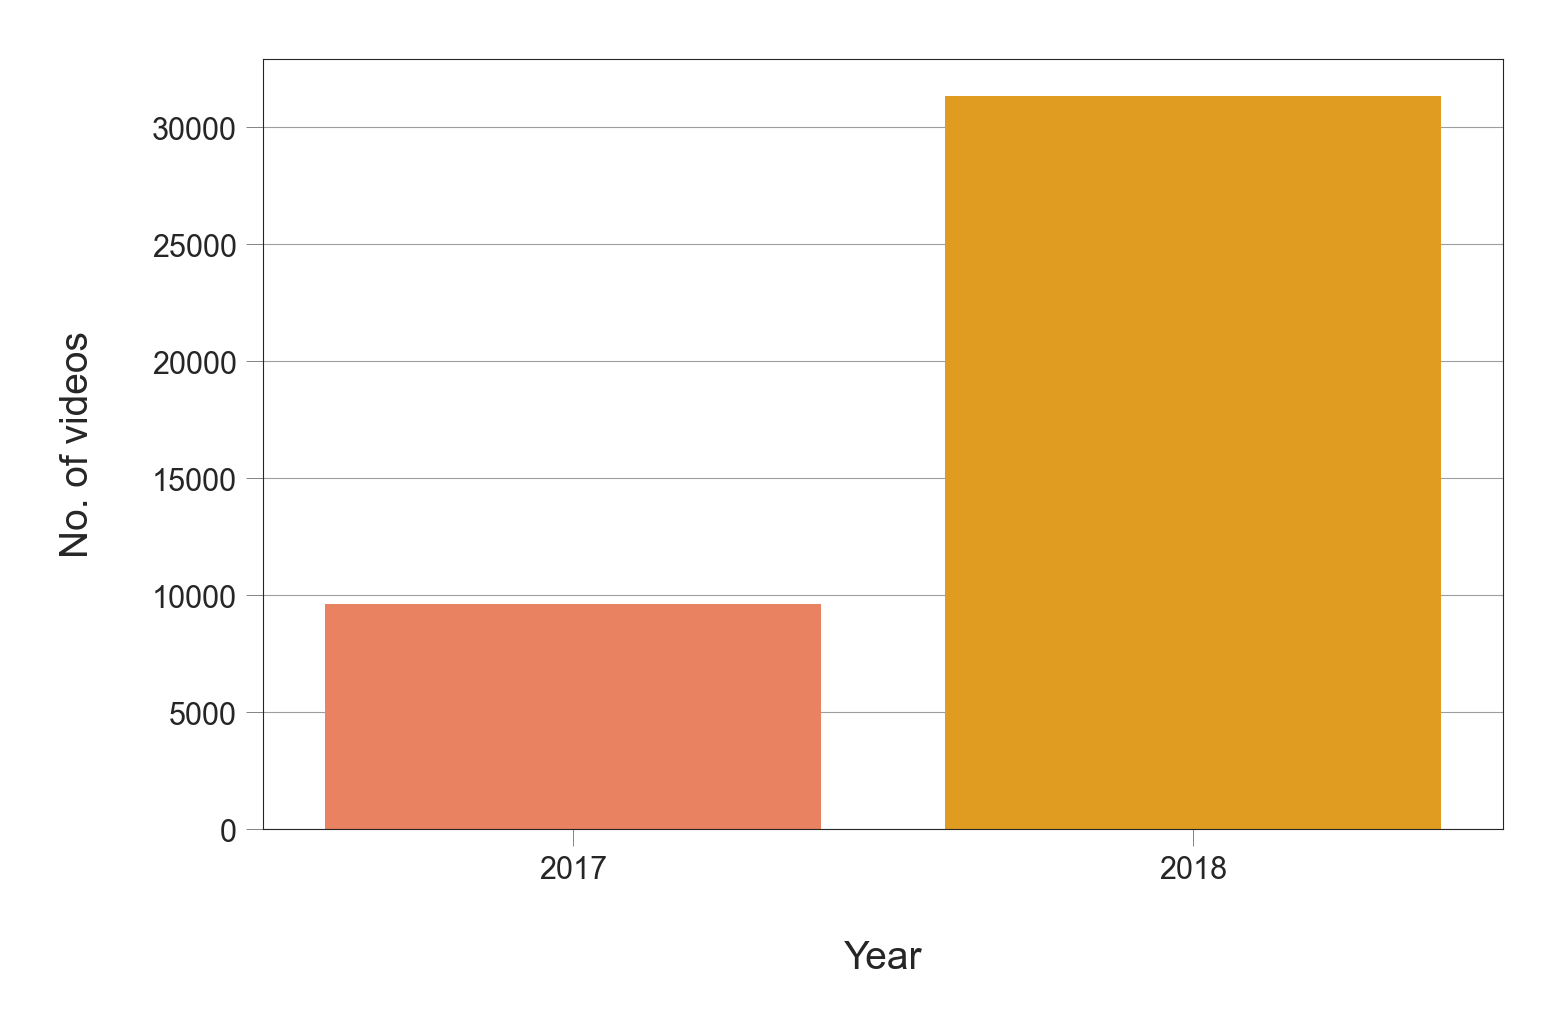

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'trending_date' to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Extract the year
df['year'] = df['trending_date'].dt.year

# Count the number of videos for each year
cdf = df.groupby('year').size().reset_index(name='No_of_videos')

# Plotting
fig, ax = plt.subplots()
_ = sns.barplot(x='year', y='No_of_videos', data=cdf,
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel='Year', ylabel='No. of videos')

plt.show()


The code calculates the relative frequency of each year by extracting the first two characters from the "trending_date" column and counting their occurrences, normalized by the total count of values.



In [19]:
#df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
df["trending_date"].dt.year.value_counts(normalize=True)


trending_date
2018   0.77
2017   0.23
Name: proportion, dtype: float64

## <a name="descn"></a>Describtion of numerical columns


Print the describe of the data frame

In [20]:
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count,year
count,40949,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00
mean,2018-02-27 06:22:42.494810624,19.97,2360784.64,74266.70,3711.40,8446.80,2017.77
min,2017-11-14 00:00:00,1.00,549.00,0.00,0.00,0.00,2017.00
25%,2018-01-04 00:00:00,17.00,242329.00,5424.00,202.00,614.00,2018.00
50%,2018-02-26 00:00:00,24.00,681861.00,18091.00,631.00,1856.00,2018.00
75%,2018-04-24 00:00:00,25.00,1823157.00,55417.00,1938.00,5755.00,2018.00
max,2018-06-14 00:00:00,43.00,225211923.00,5613827.00,1674420.00,1361580.00,2018.00
std,NaN,7.57,7394113.76,228885.34,29029.71,37430.49,0.42




### <a name="vh"></a>Views histogram


The code creates a histogram of the "views" column using seaborn's distplot function, specifying the number of bins, color, and other parameters. It also sets the labels for the x-axis and y-axis, adjusts the x-axis limits and ticks, and rotates the x-axis tick labels.






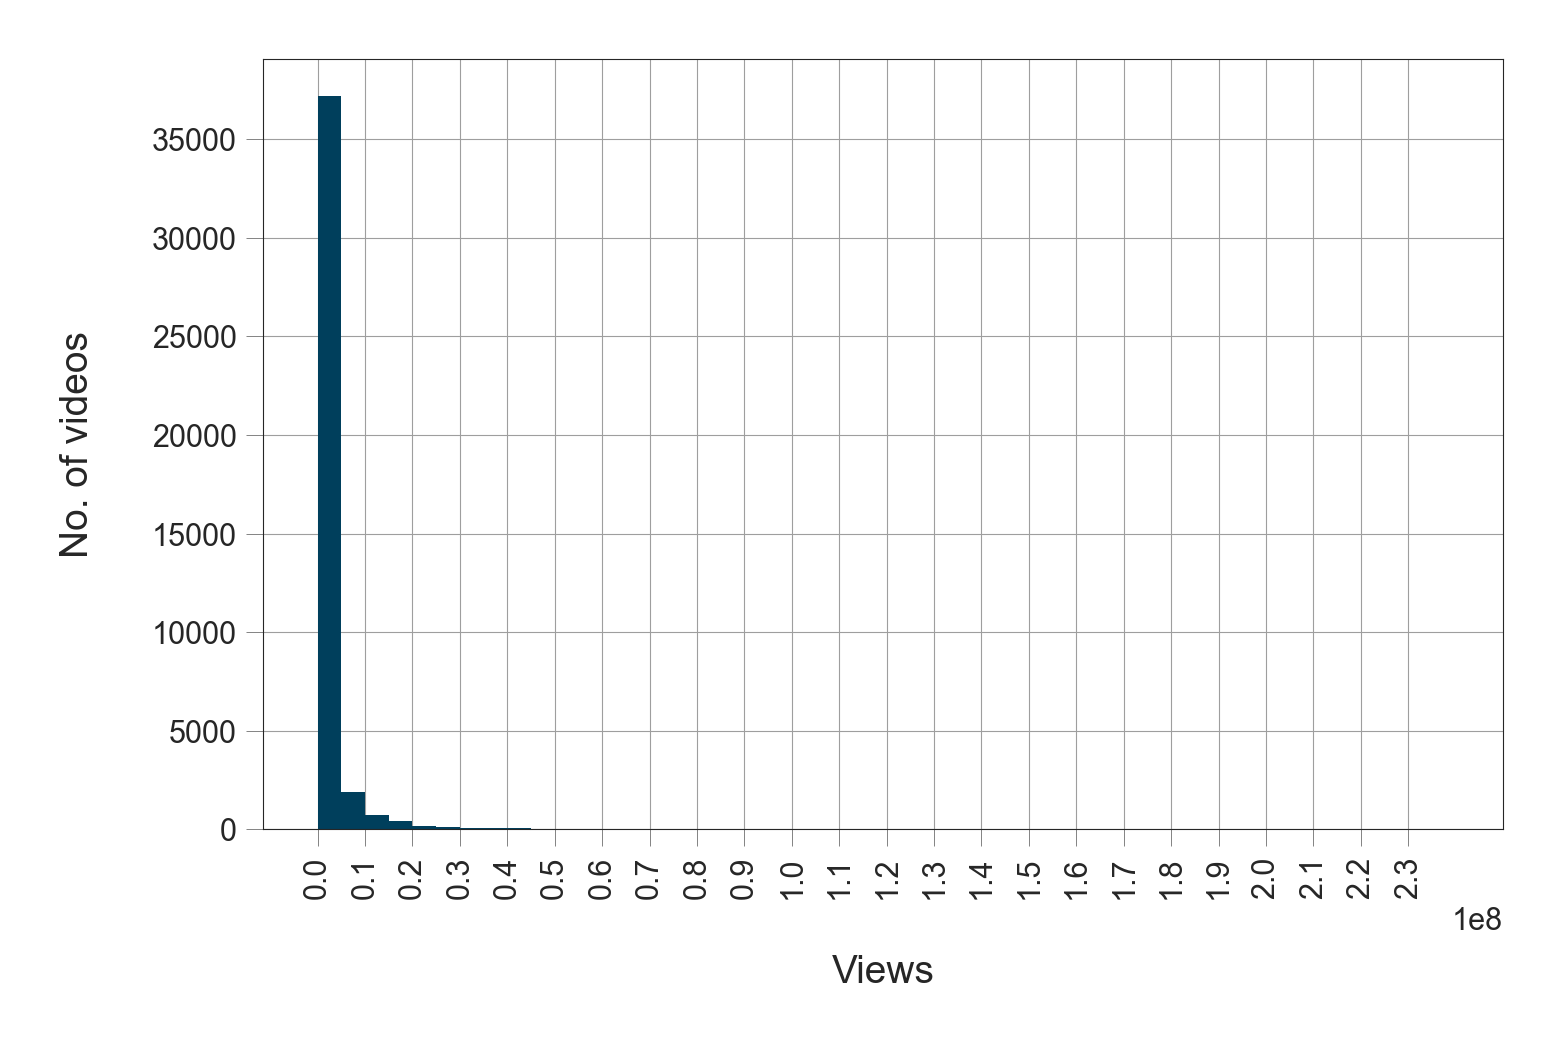

In [21]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4],
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

The code creates a histogram of the "views" column, but only for values that are less than 25 million (< 25e6). It uses seaborn's distplot function, specifying the color and other parameters. It also sets the labels for the x-axis and y-axis.






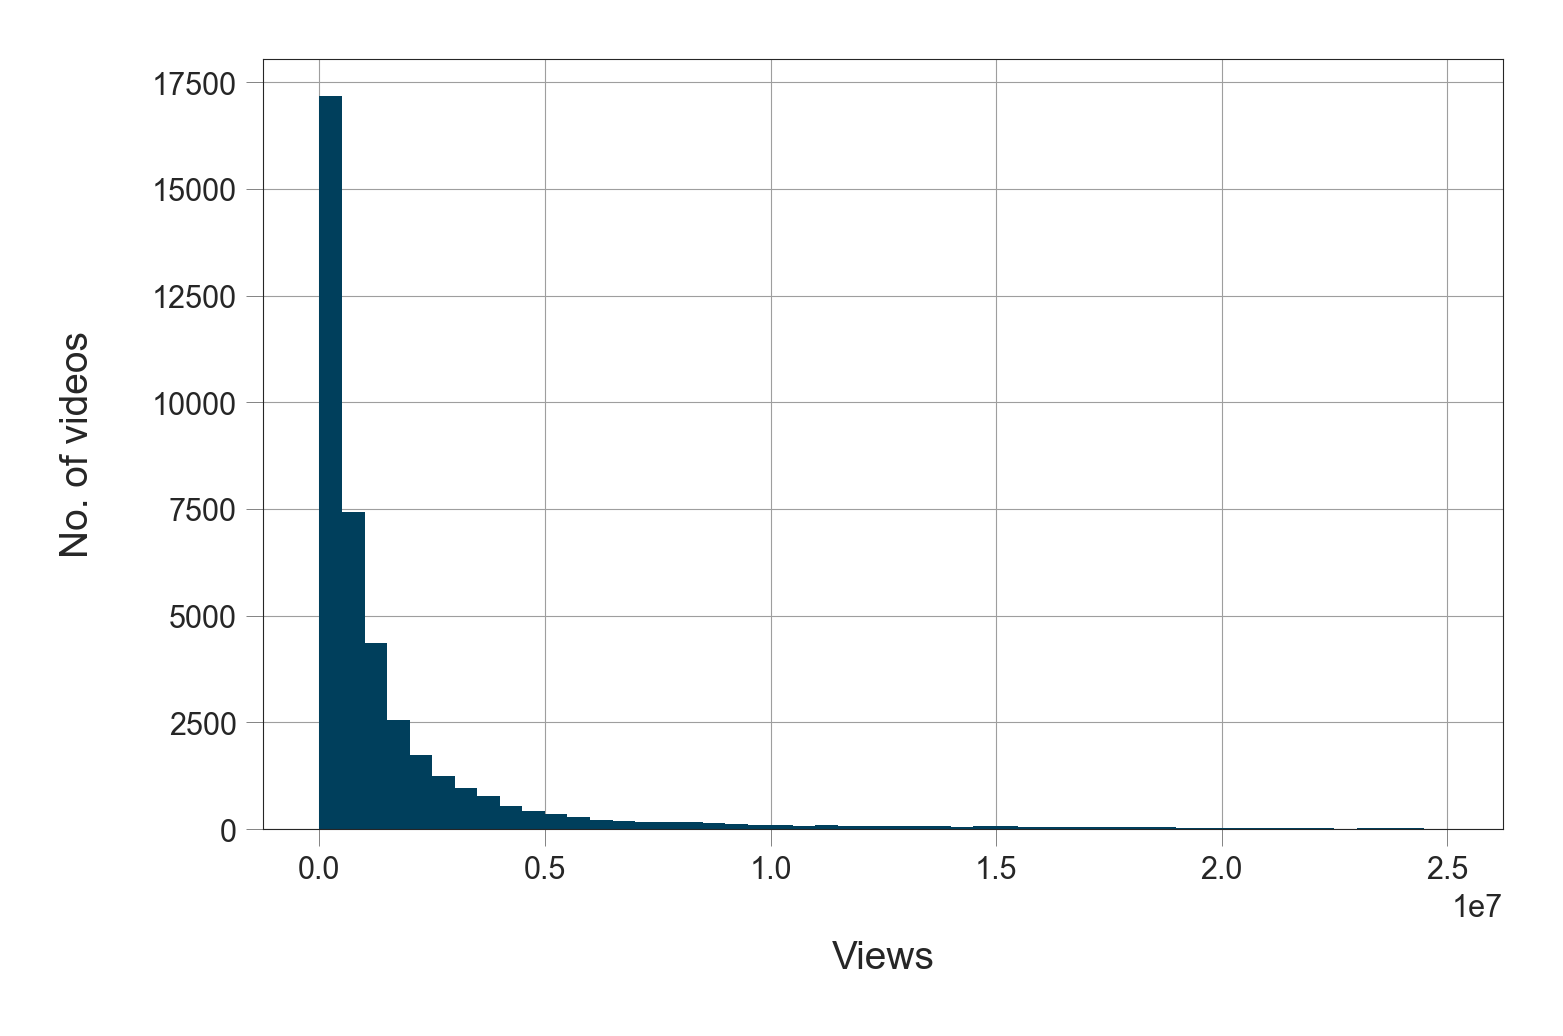

In [22]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

The code calculates the percentage of videos in the dataset that have views less than 1 million (< 1e6) by filtering the dataframe based on the condition and dividing the count of those videos by the total count of videos. It then multiplies the result by 100 to express it as a percentage.






In [23]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062



### <a name="lh"></a>Likes histogram



The code creates a subplot with adjusted spacing, then plots a histogram of the "likes" column from the DataFrame df. The histogram is displayed without a kernel density estimate (kde), and the color and alpha values are customized. The x-axis is labeled as "Likes", the y-axis as "No. of videos", and the x-tick labels are rotated by 90 degrees.






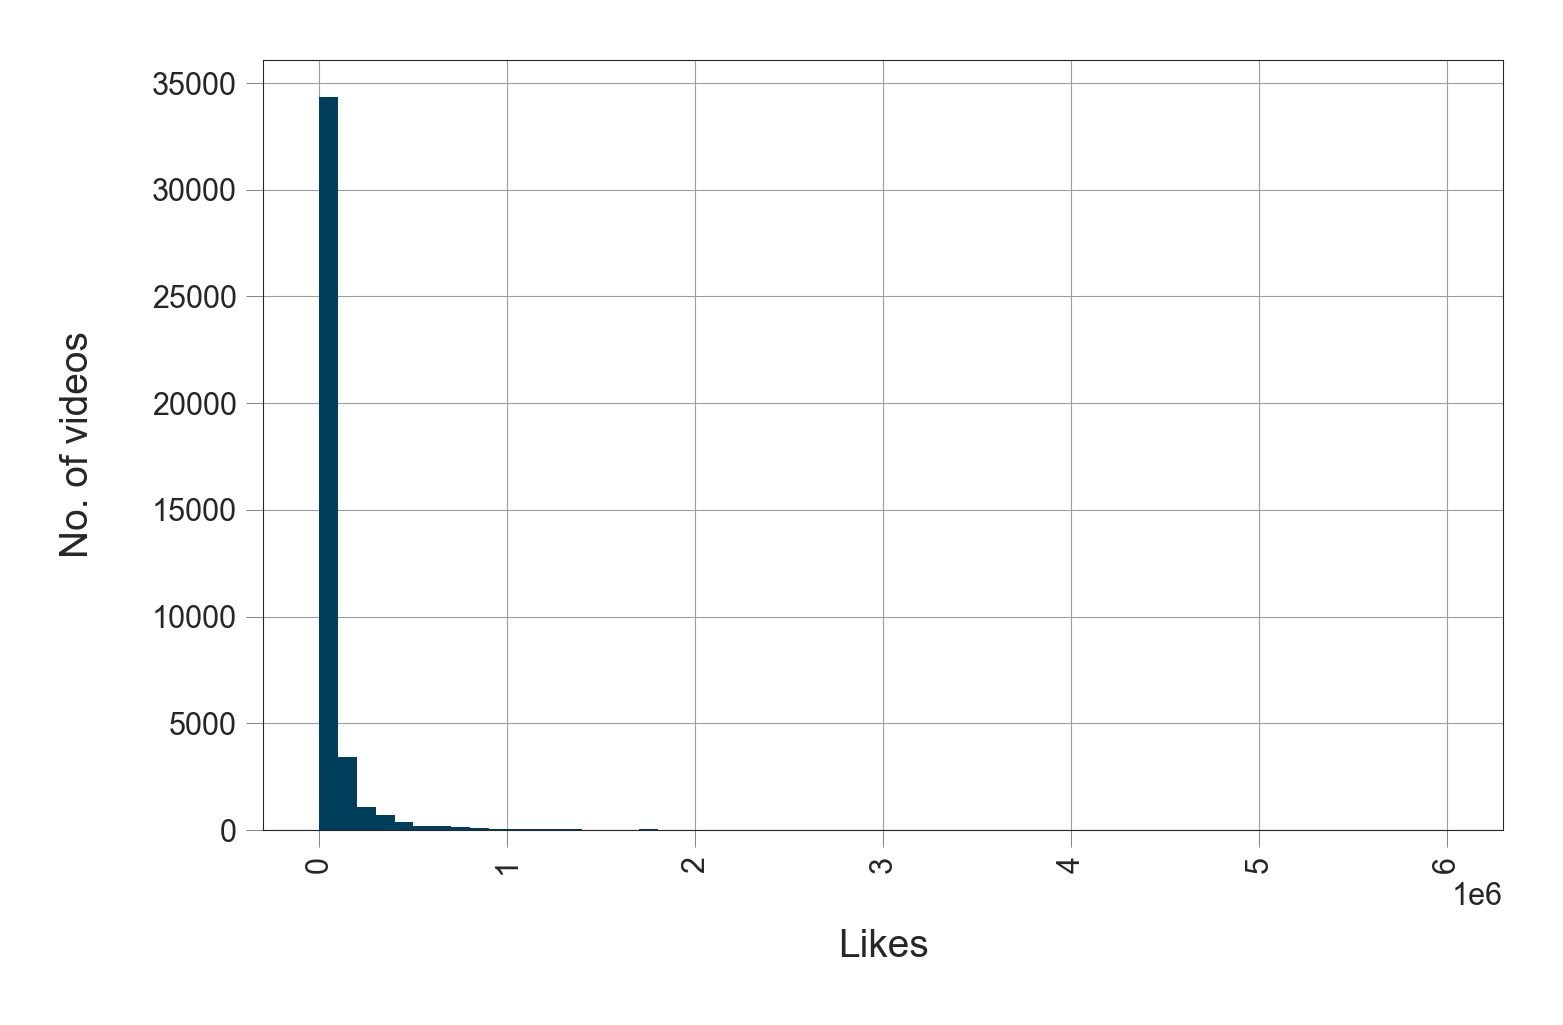

In [24]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1},
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

The code creates a subplot and plots a histogram of the "likes" column from the DataFrame df, considering only values less than or equal to 100,000. The histogram is displayed without a kernel density estimate (kde), and the color and alpha values are customized. The x-axis is labeled as "Likes", and the y-axis as "No. of videos".






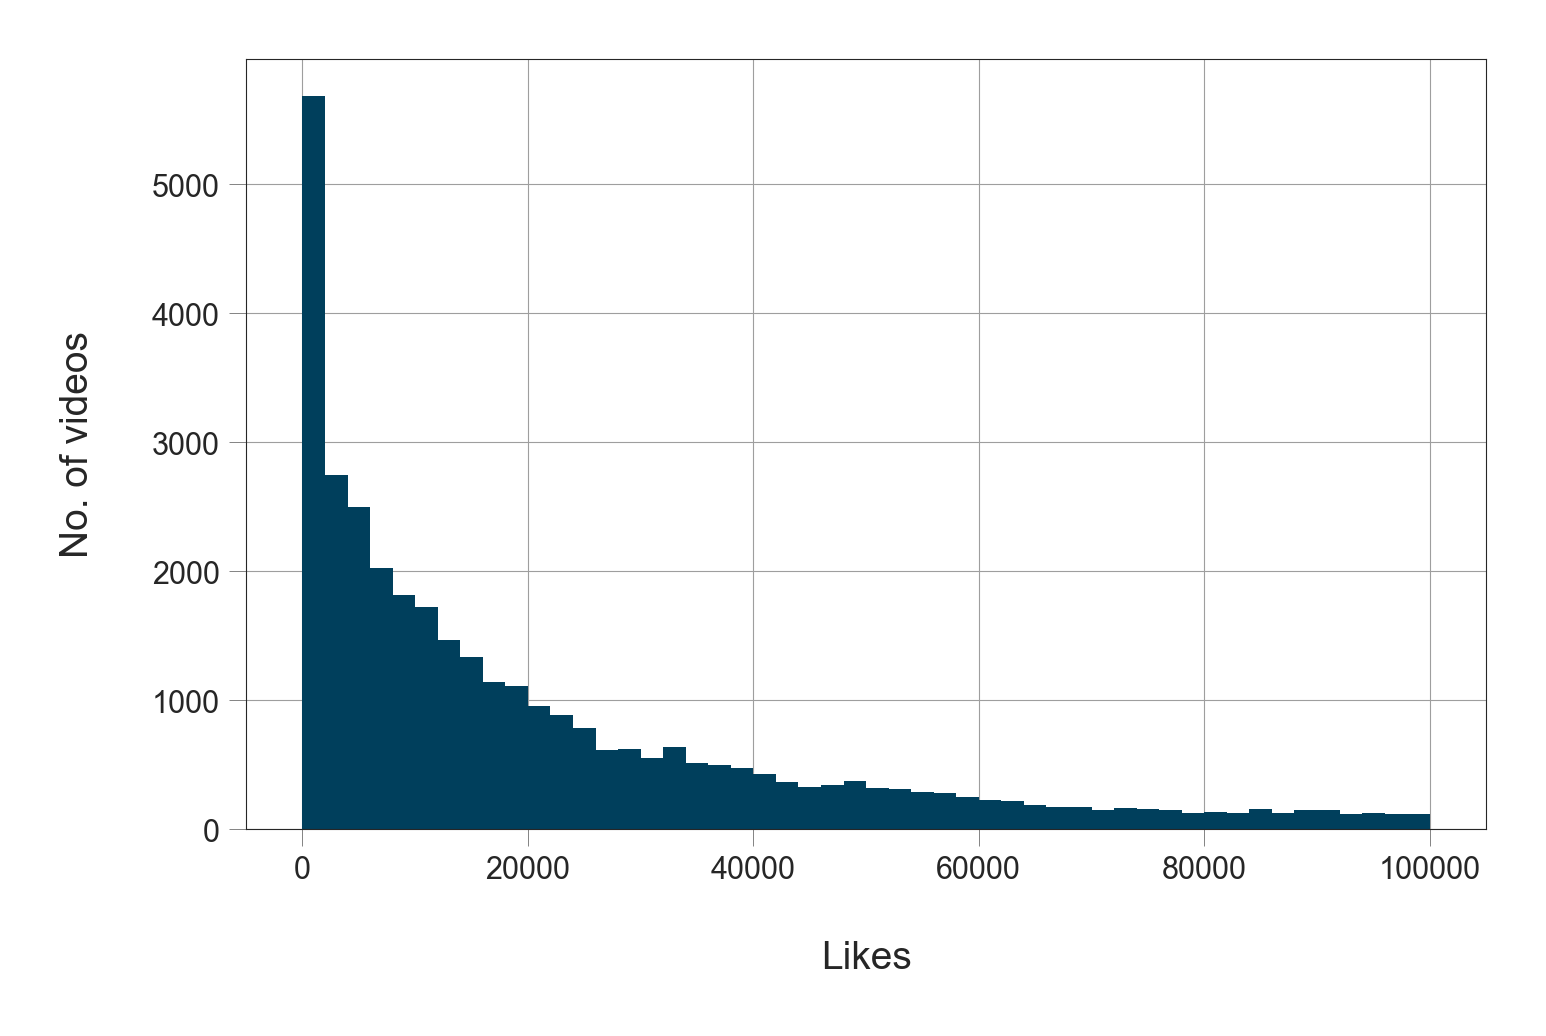

In [25]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

The code calculates the percentage of videos in the DataFrame df where the number of likes is less than 40,000, relative to the total number of videos.






In [26]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

68.4900730176561

### <a name="ch"></a>Comment count histogram

The code generates a histogram of the comment count distribution in the DataFrame df, visualizing the number of videos for each range of comment counts.






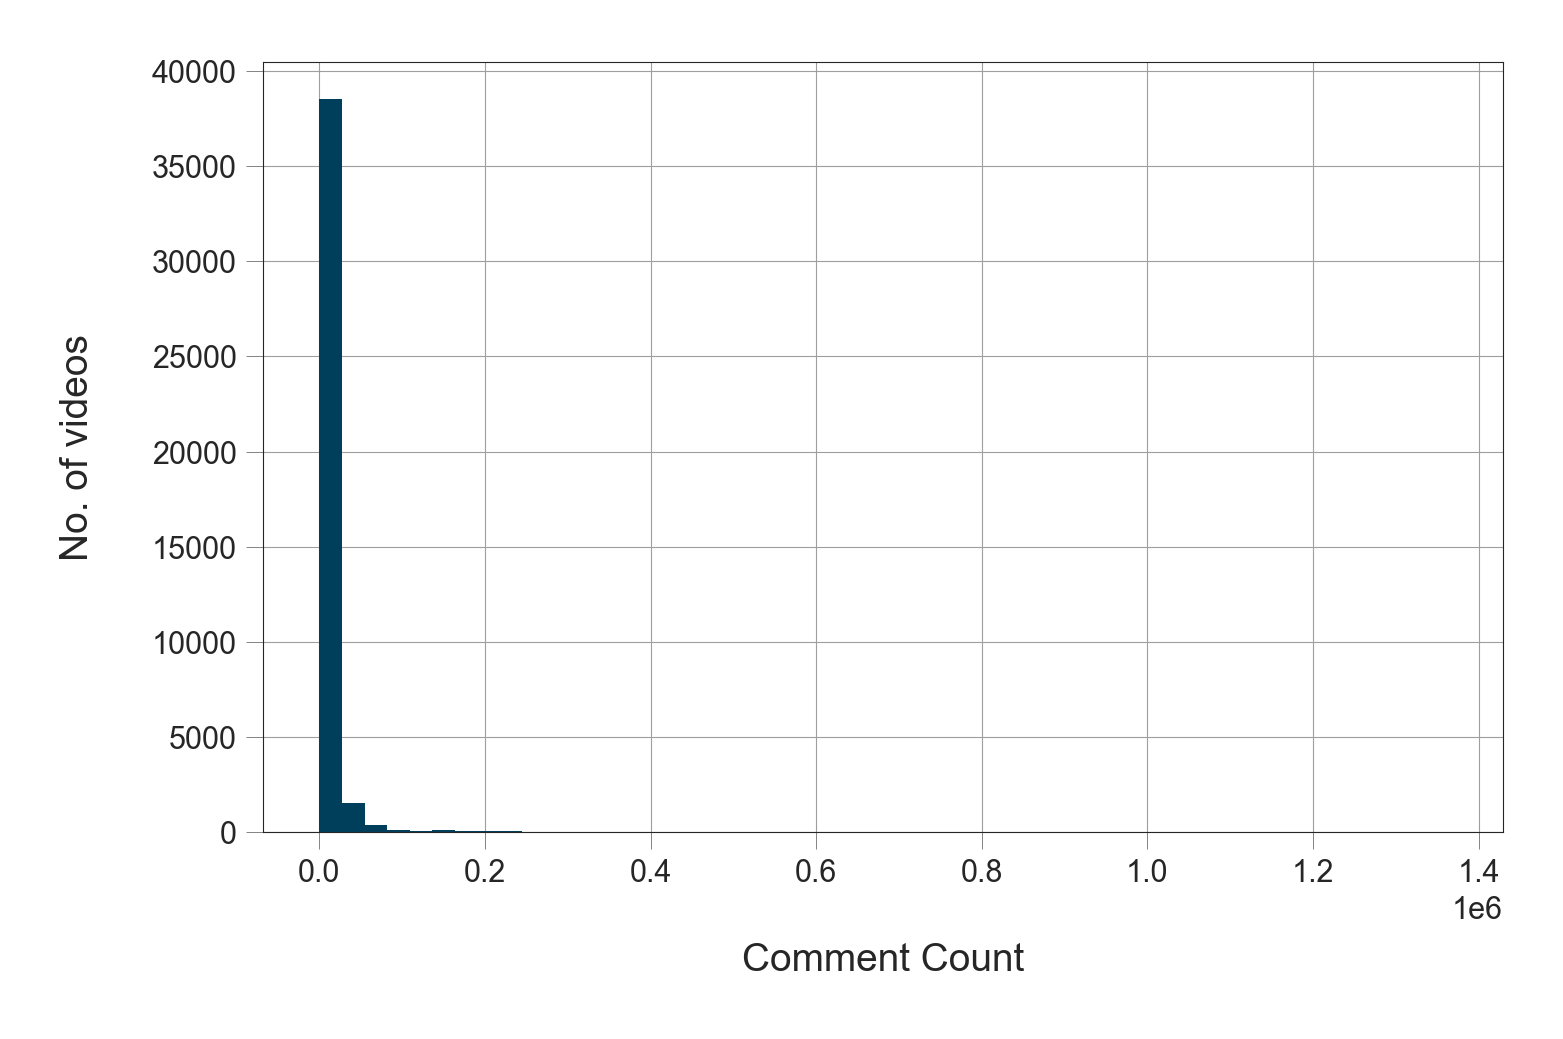

In [27]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

The code generates a histogram of the comment count distribution in the DataFrame df, excluding videos with comment counts exceeding 200,000. It visualizes the number of videos for each range of comment counts within the specified limit.






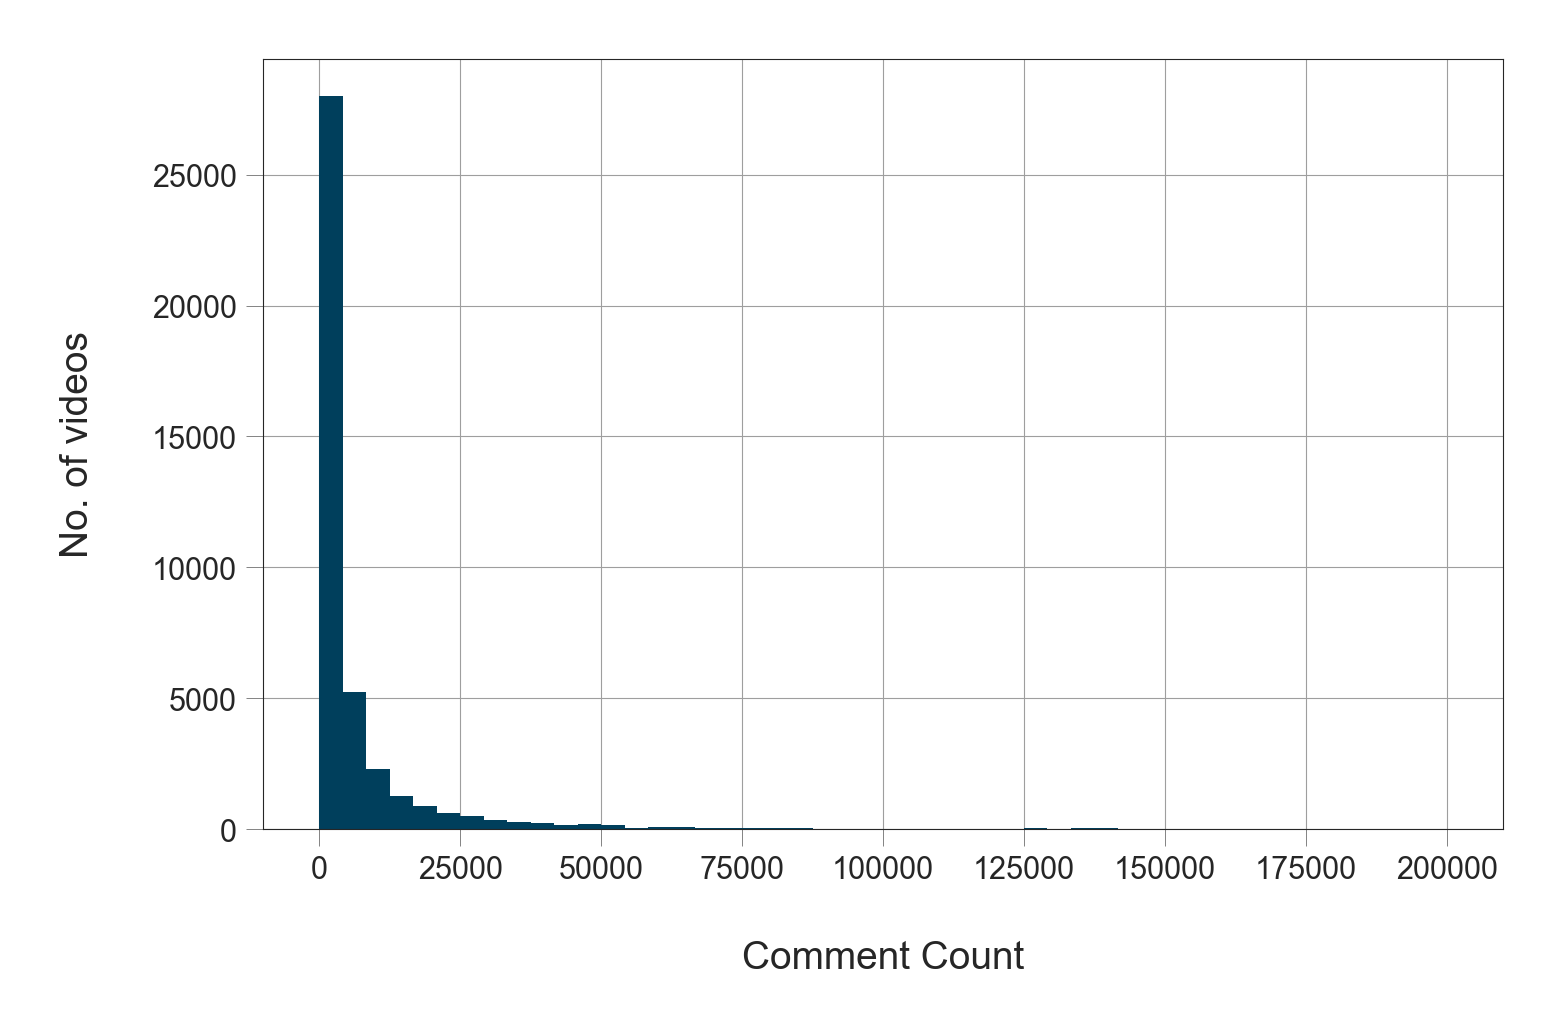

In [28]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1},
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

The code calculates the percentage of videos in the DataFrame df that have a comment count below 4000, relative to the total number of videos in the dataset.






In [29]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

## <a name="descnn"></a>Description on non-numerical columns


The code df.describe(include = ['O']) generates a summary of descriptive statistics for columns in a DataFrame that contain object (string) data types, providing information such as count, unique values, top value, and frequency.






In [30]:
df.describe(include = ['O'])

,video_id,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949
unique,6351,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,30,203,50,1535,30,570


The code above groups the DataFrame df by the "video_id" column and stores each group in a list called groups. It then iterates over the groups and checks if the "title" column has more than one unique value. If it does, the group is appended to the wanted_groups list. The code then retrieves the first element from wanted_groups using wanted_groups[0].






In [31]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year
14266,0ufNmUyf2co,2018-01-26,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018
14491,0ufNmUyf2co,2018-01-27,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018
14706,0ufNmUyf2co,2018-01-28,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018
14931,0ufNmUyf2co,2018-01-29,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018
15175,0ufNmUyf2co,2018-01-30,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018
15385,0ufNmUyf2co,2018-01-31,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...,2018


## <a name="cap"></a>How many trending video titles contain capitalized word?
The given code defines a function contains_capitalized_word that checks if a string contains any capitalized words. It then applies this function to the "title" column of a DataFrame, creating a new column called "contains_capitalized" with boolean values. The code further generates a pie chart to visualize the count of titles containing capitalized words versus those that do not.






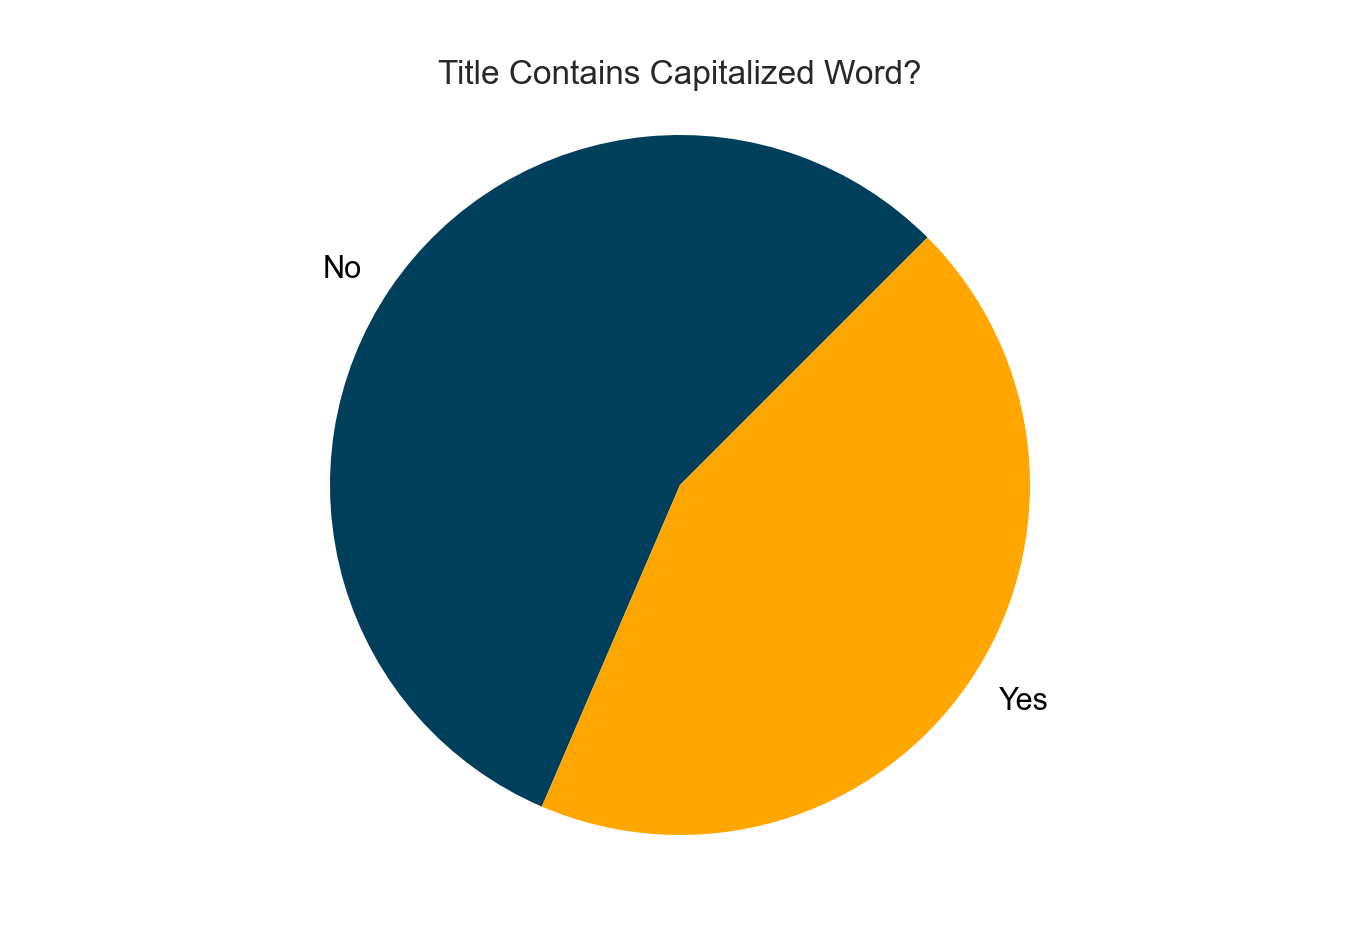

In [32]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

The code df["contains_capitalized"].value_counts(normalize=True) calculates and returns the frequency (or proportion) of unique values in the "contains_capitalized" column of the DataFrame df, normalized to represent percentages instead of counts.






In [33]:
df["contains_capitalized"].value_counts(normalize=True)

contains_capitalized
False   0.56
True    0.44
Name: proportion, dtype: float64

## <a name="len"></a>Video title lengths


The code calculates the length of each title in the dataframe "df" and assigns the values to a new column called "title_length." It then creates a histogram plot using seaborn to visualize the distribution of title lengths in the dataset, with the x-axis representing title length and the y-axis representing the number of videos.






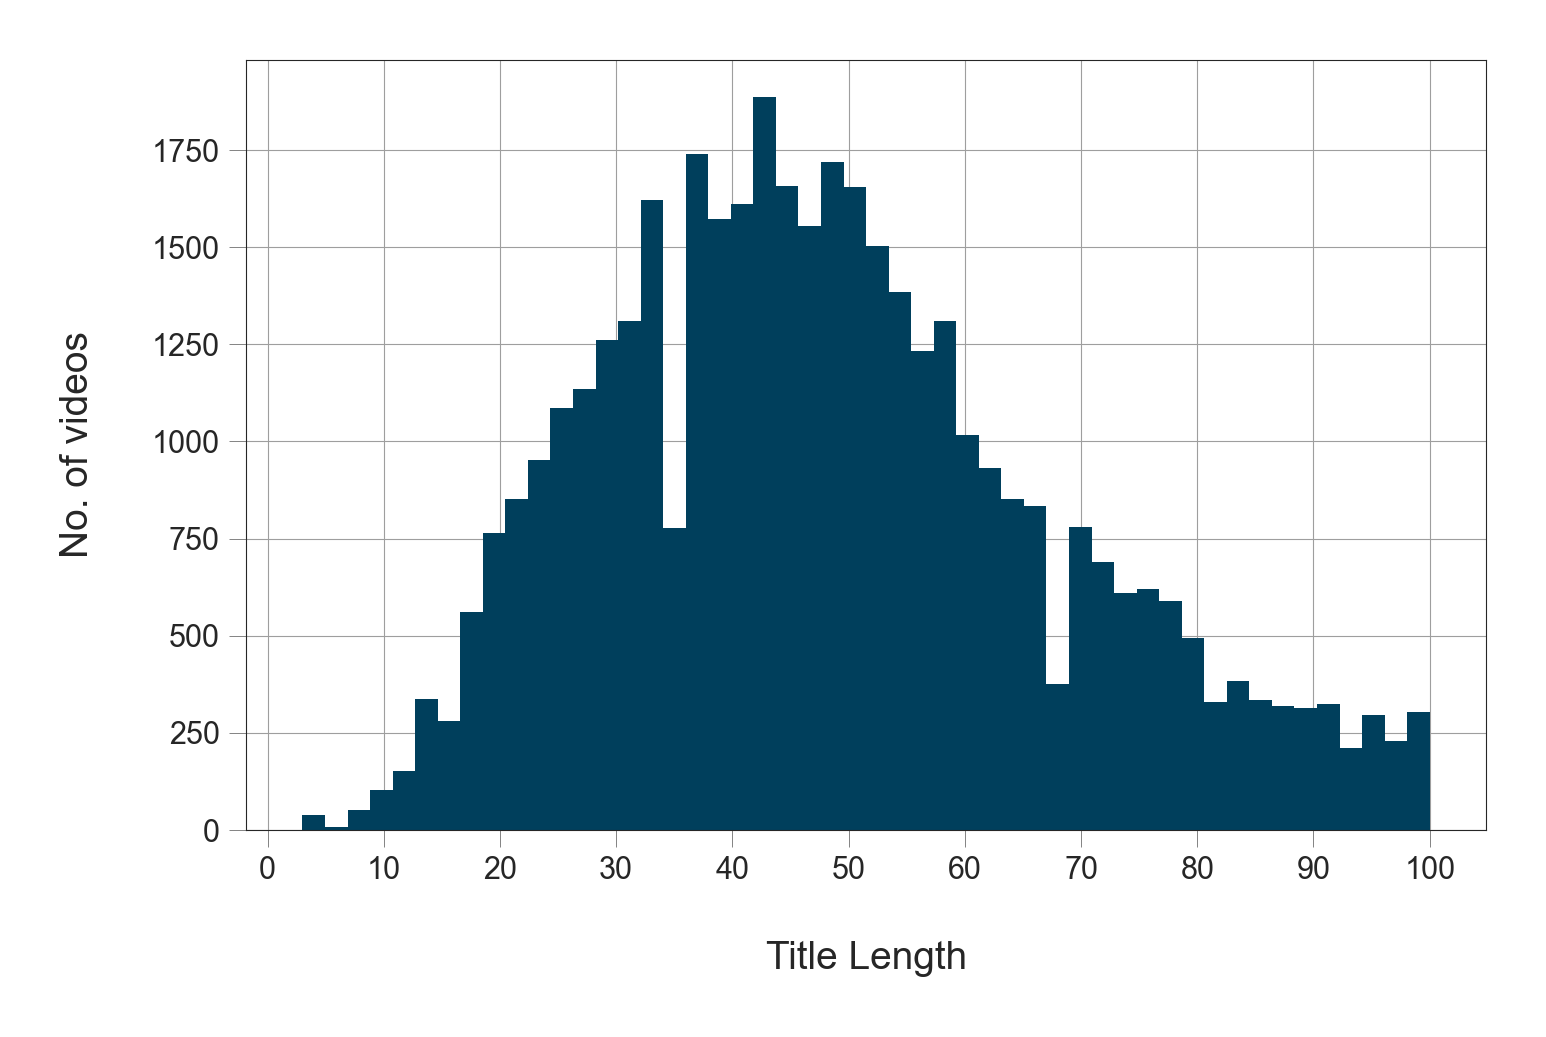

In [34]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

The code creates a scatter plot using matplotlib, where the x-axis represents the number of views and the y-axis represents the length of the titles in the dataframe "df." The scatter plot visualizes the relationship between views and title length, with each point representing a video, and the color, edge color, and linewidths of the points are set accordingly.






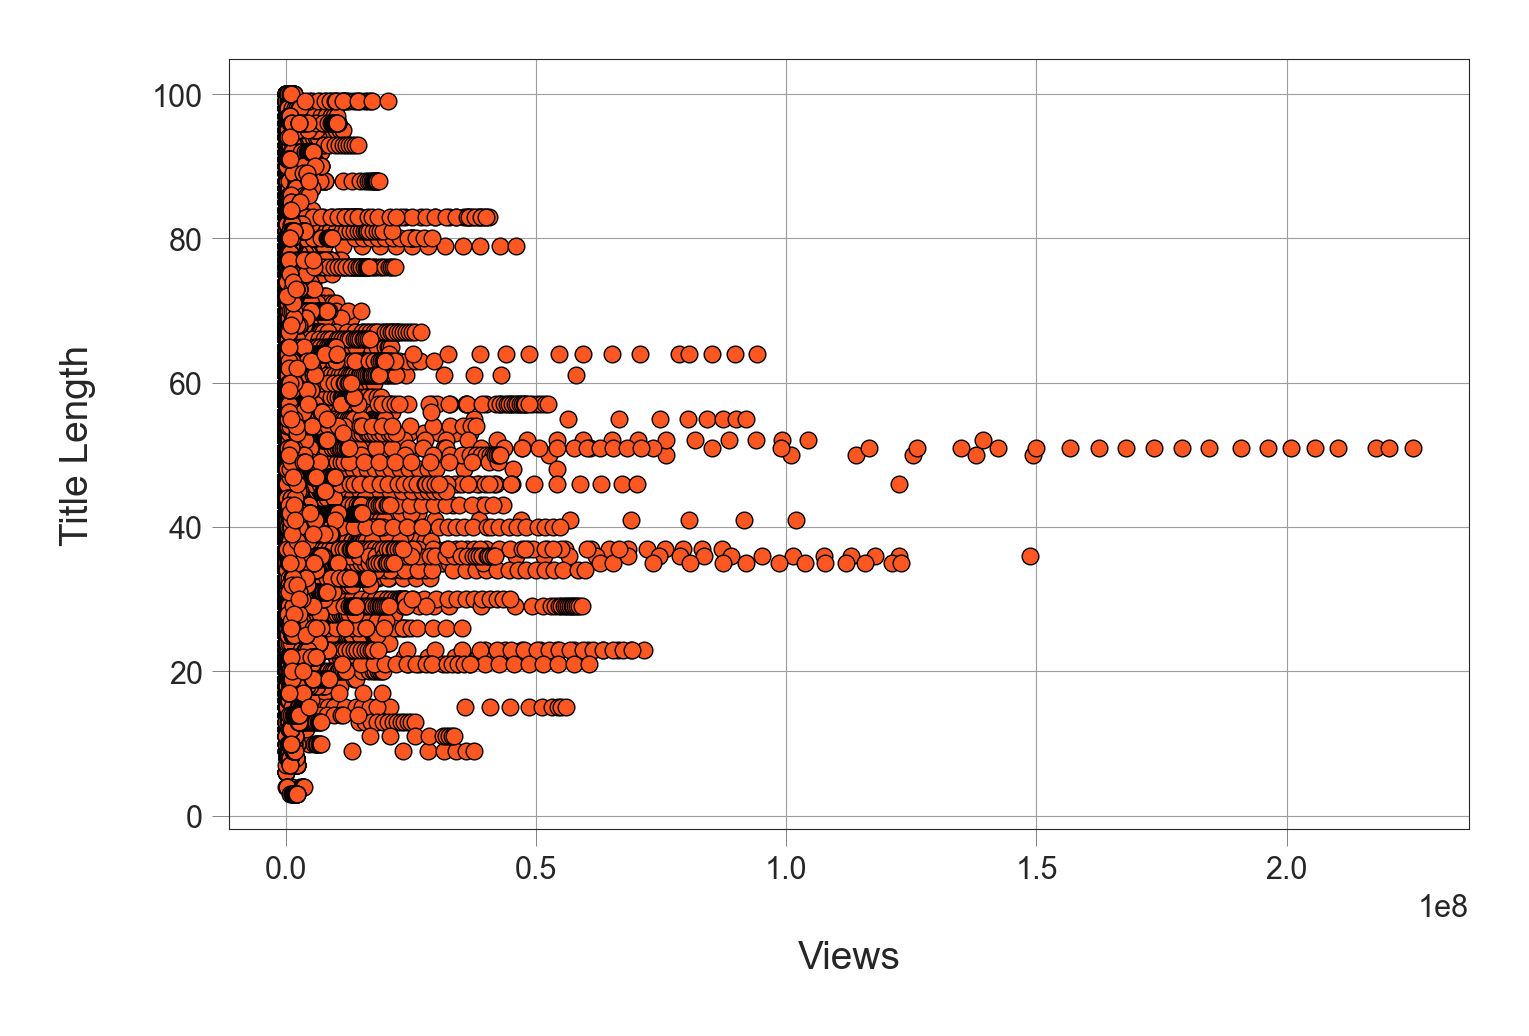

In [35]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

## <a name="corr"></a>Correlation between dataset variables
The code calculates the correlation matrix of the dataframe "df," which provides a measure of the linear relationship between all pairs of numerical columns in the dataframe.






In [37]:
#df.corr()
import pandas as pd

# Assuming 'df' is your DataFrame

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


               category_id  views  likes  dislikes  comment_count  year  \
category_id           1.00  -0.17  -0.17     -0.03          -0.08  0.00   
views                -0.17   1.00   0.85      0.47           0.62  0.08   
likes                -0.17   0.85   1.00      0.45           0.80  0.06   
dislikes             -0.03   0.47   0.45      1.00           0.70  0.01   
comment_count        -0.08   0.62   0.80      0.70           1.00  0.04   
year                  0.00   0.08   0.06      0.01           0.04  1.00   
title_length          0.02  -0.04  -0.08     -0.03          -0.07 -0.01   

               title_length  
category_id            0.02  
views                 -0.04  
likes                 -0.08  
dislikes              -0.03  
comment_count         -0.07  
year                  -0.01  
title_length           1.00  


The code creates a heatmap plot using seaborn to visualize the correlation matrix of the numerical and boolean columns in the dataframe "df." The column names are formatted and displayed as labels on both the x-axis and y-axis of the heatmap, and the correlation values are annotated on the heatmap.






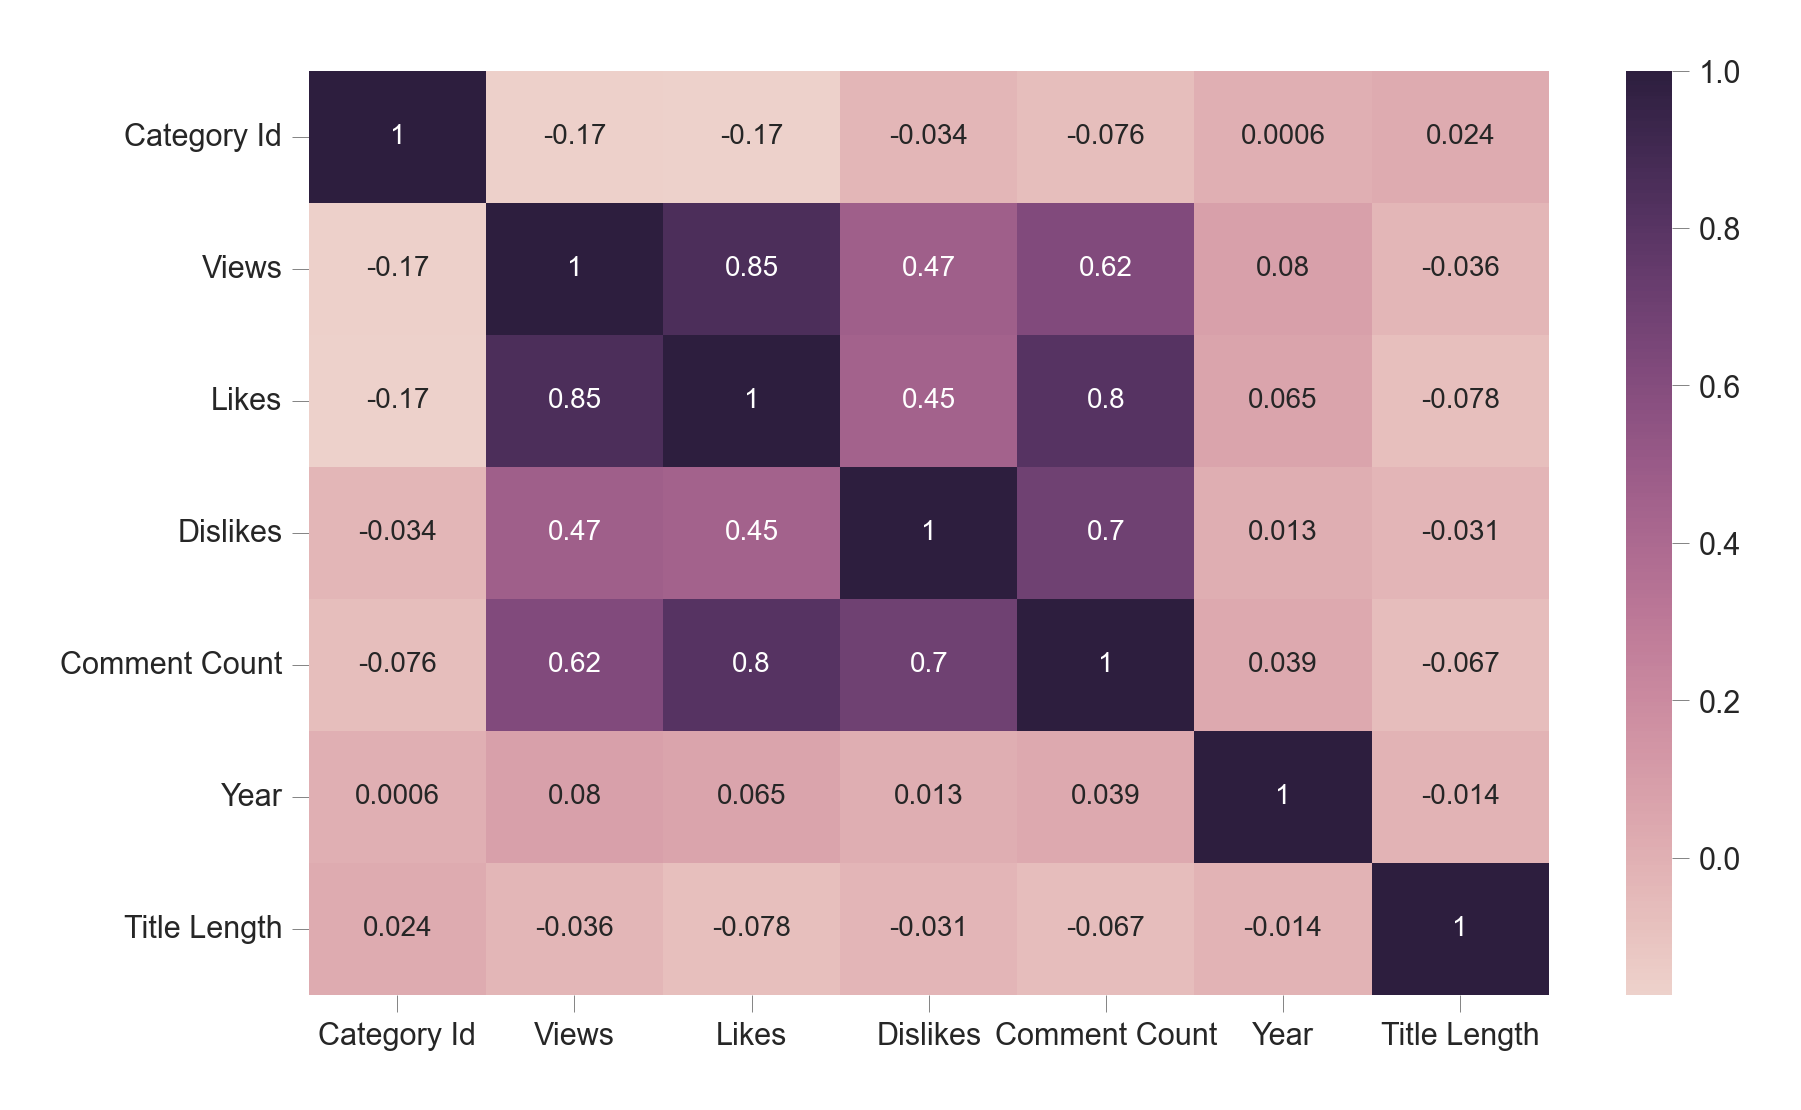

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create human-readable labels
h_labels = [x.replace('_', ' ').title() for x in list(numeric_columns.columns.values)]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(correlation_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

plt.show()


The code creates a scatter plot using matplotlib, where the x-axis represents the number of views and the y-axis represents the number of likes in the dataframe "df." The scatter plot visualizes the relationship between views and likes, with each point representing a data point, and the color, edge color, and linewidths of the points are set accordingly.






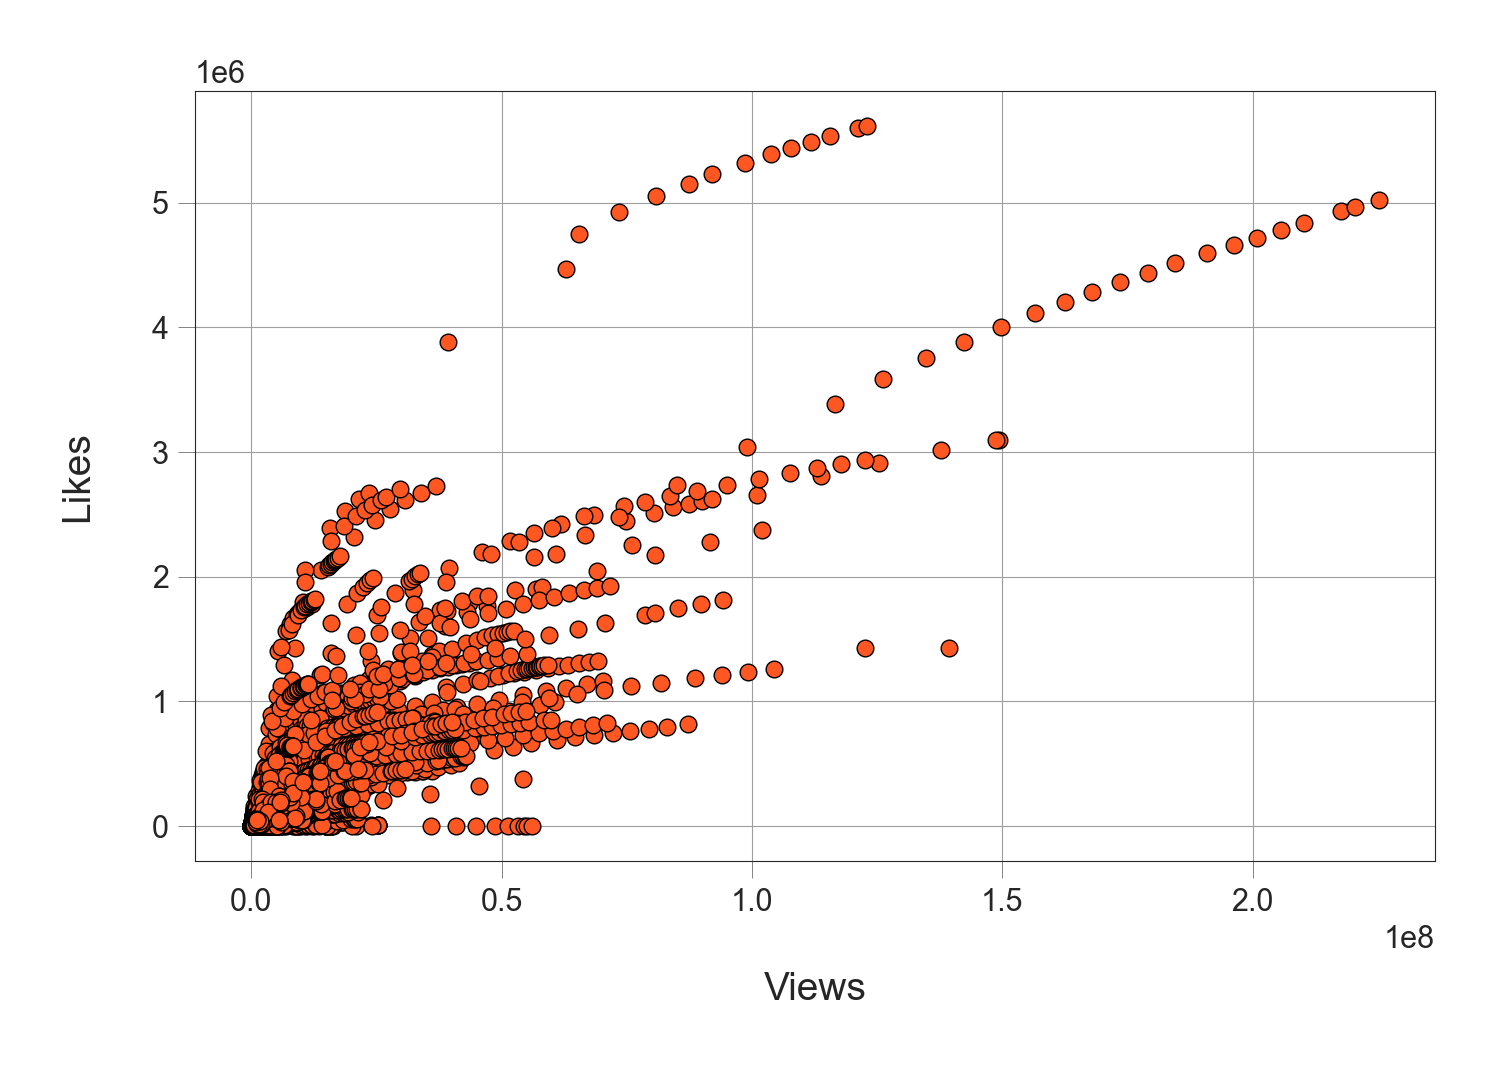

In [40]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

## <a name="commti"></a>Most common words in video titles


The code splits the "title" column of the dataframe "df" into individual words, creates a list of all the words, and then counts the frequency of each word. The code returns the 25 most common words along with their respective counts.






In [41]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

The code generates a word cloud visualization using the WordCloud library. It creates a word cloud from a list of words called title_words by specifying the width, height, background color, and colormap. The resulting word cloud is then displayed using imshow with the axes turned off.






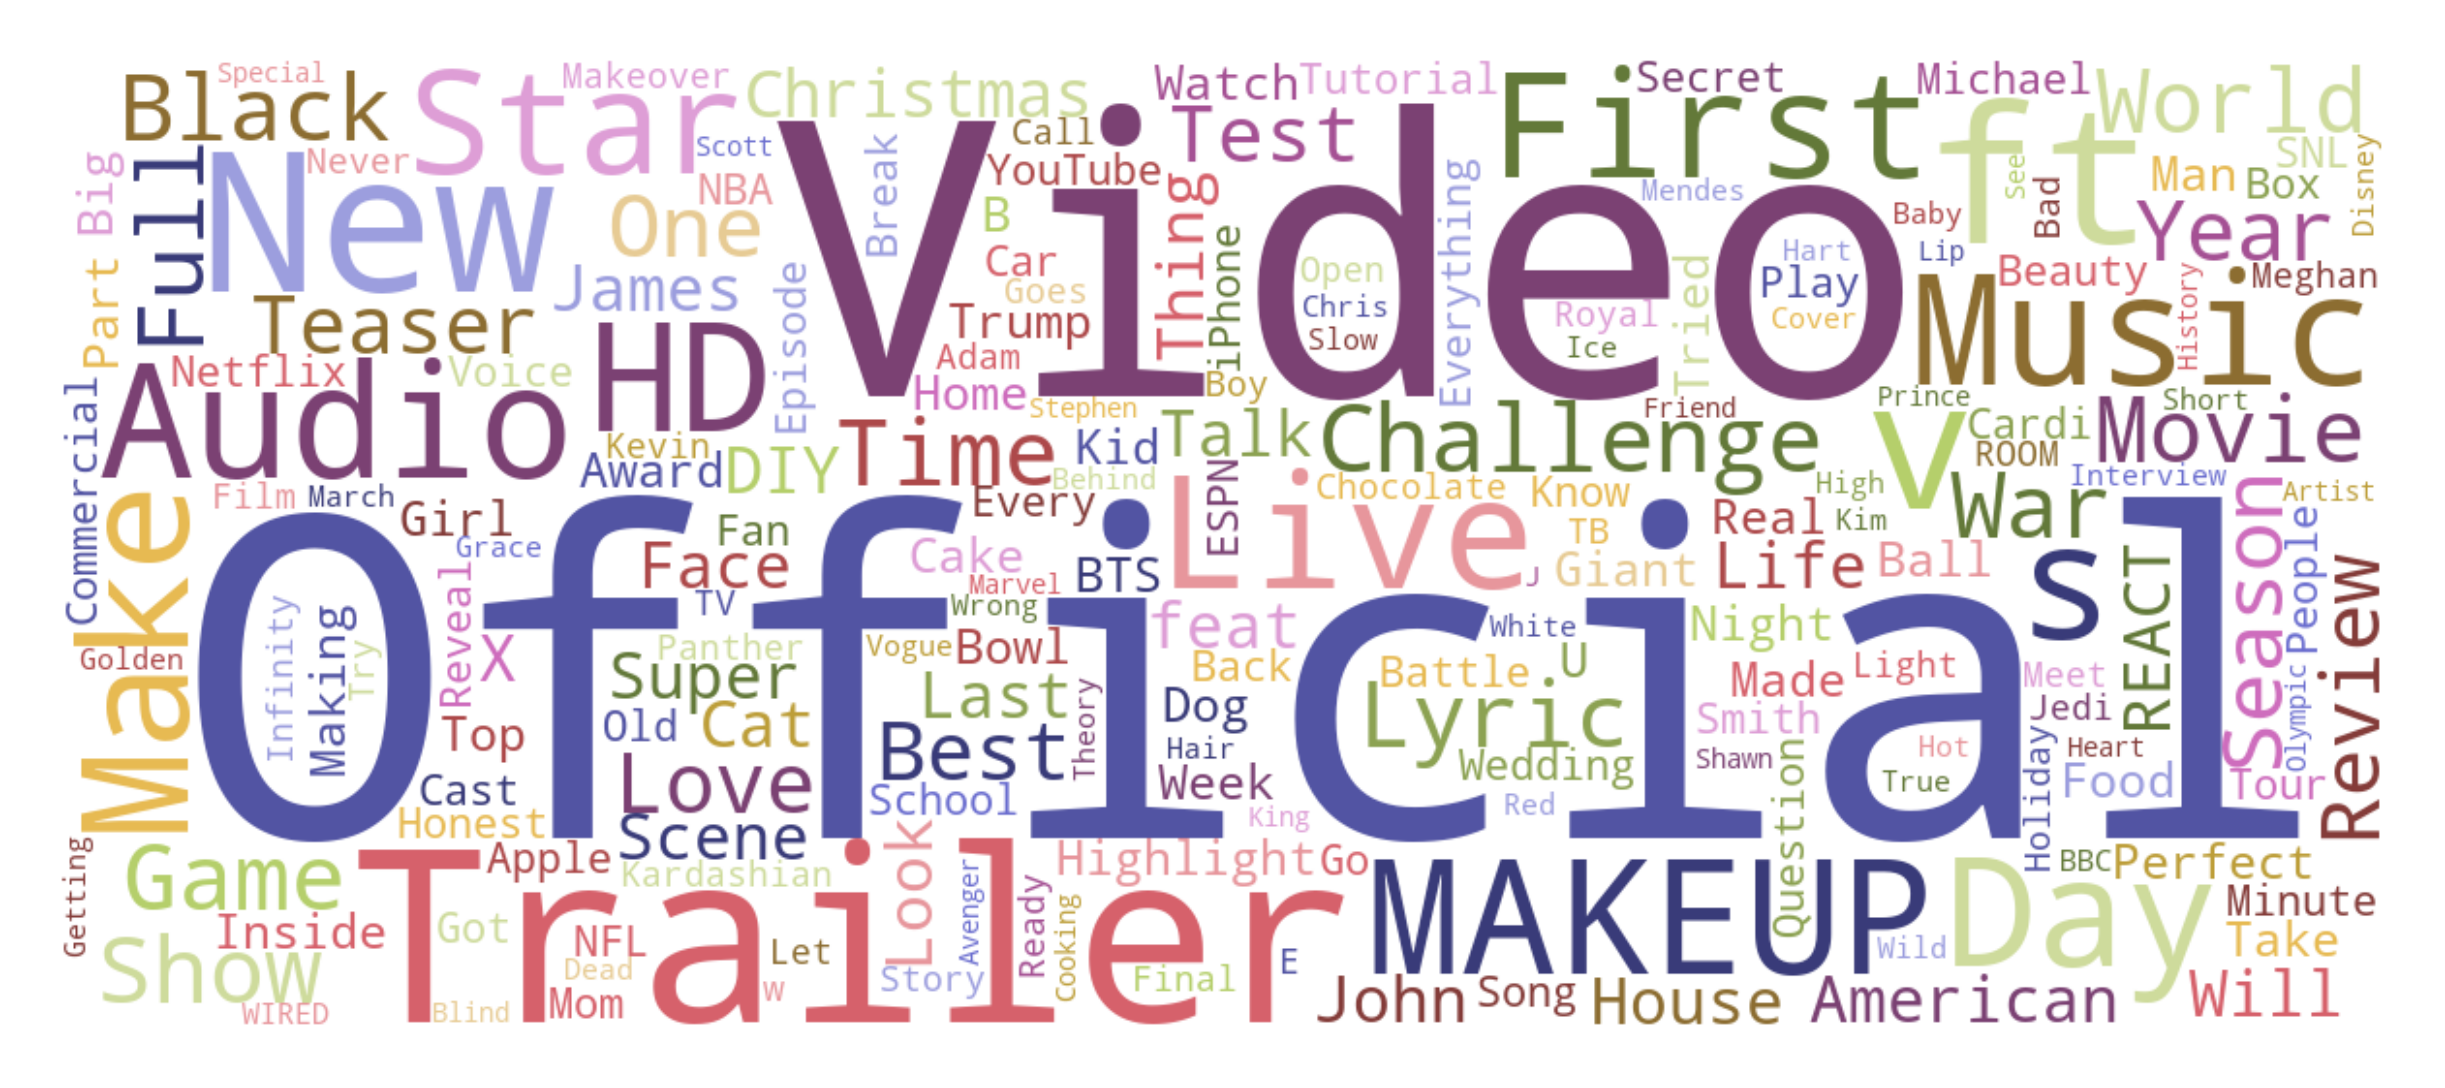

In [42]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Which channels have the largest number of trending videos?

The code calculates the count of videos for each unique channel title in the dataframe "df," selects the top 20 channels with the highest video counts, and stores the results in a new dataframe called "cdf." It then creates a horizontal bar plot using seaborn to visualize the number of videos for each channel, with the y-axis representing channel titles and the x-axis representing the count of videos. The bar colors are defined using a cubehelix palette in reverse order.






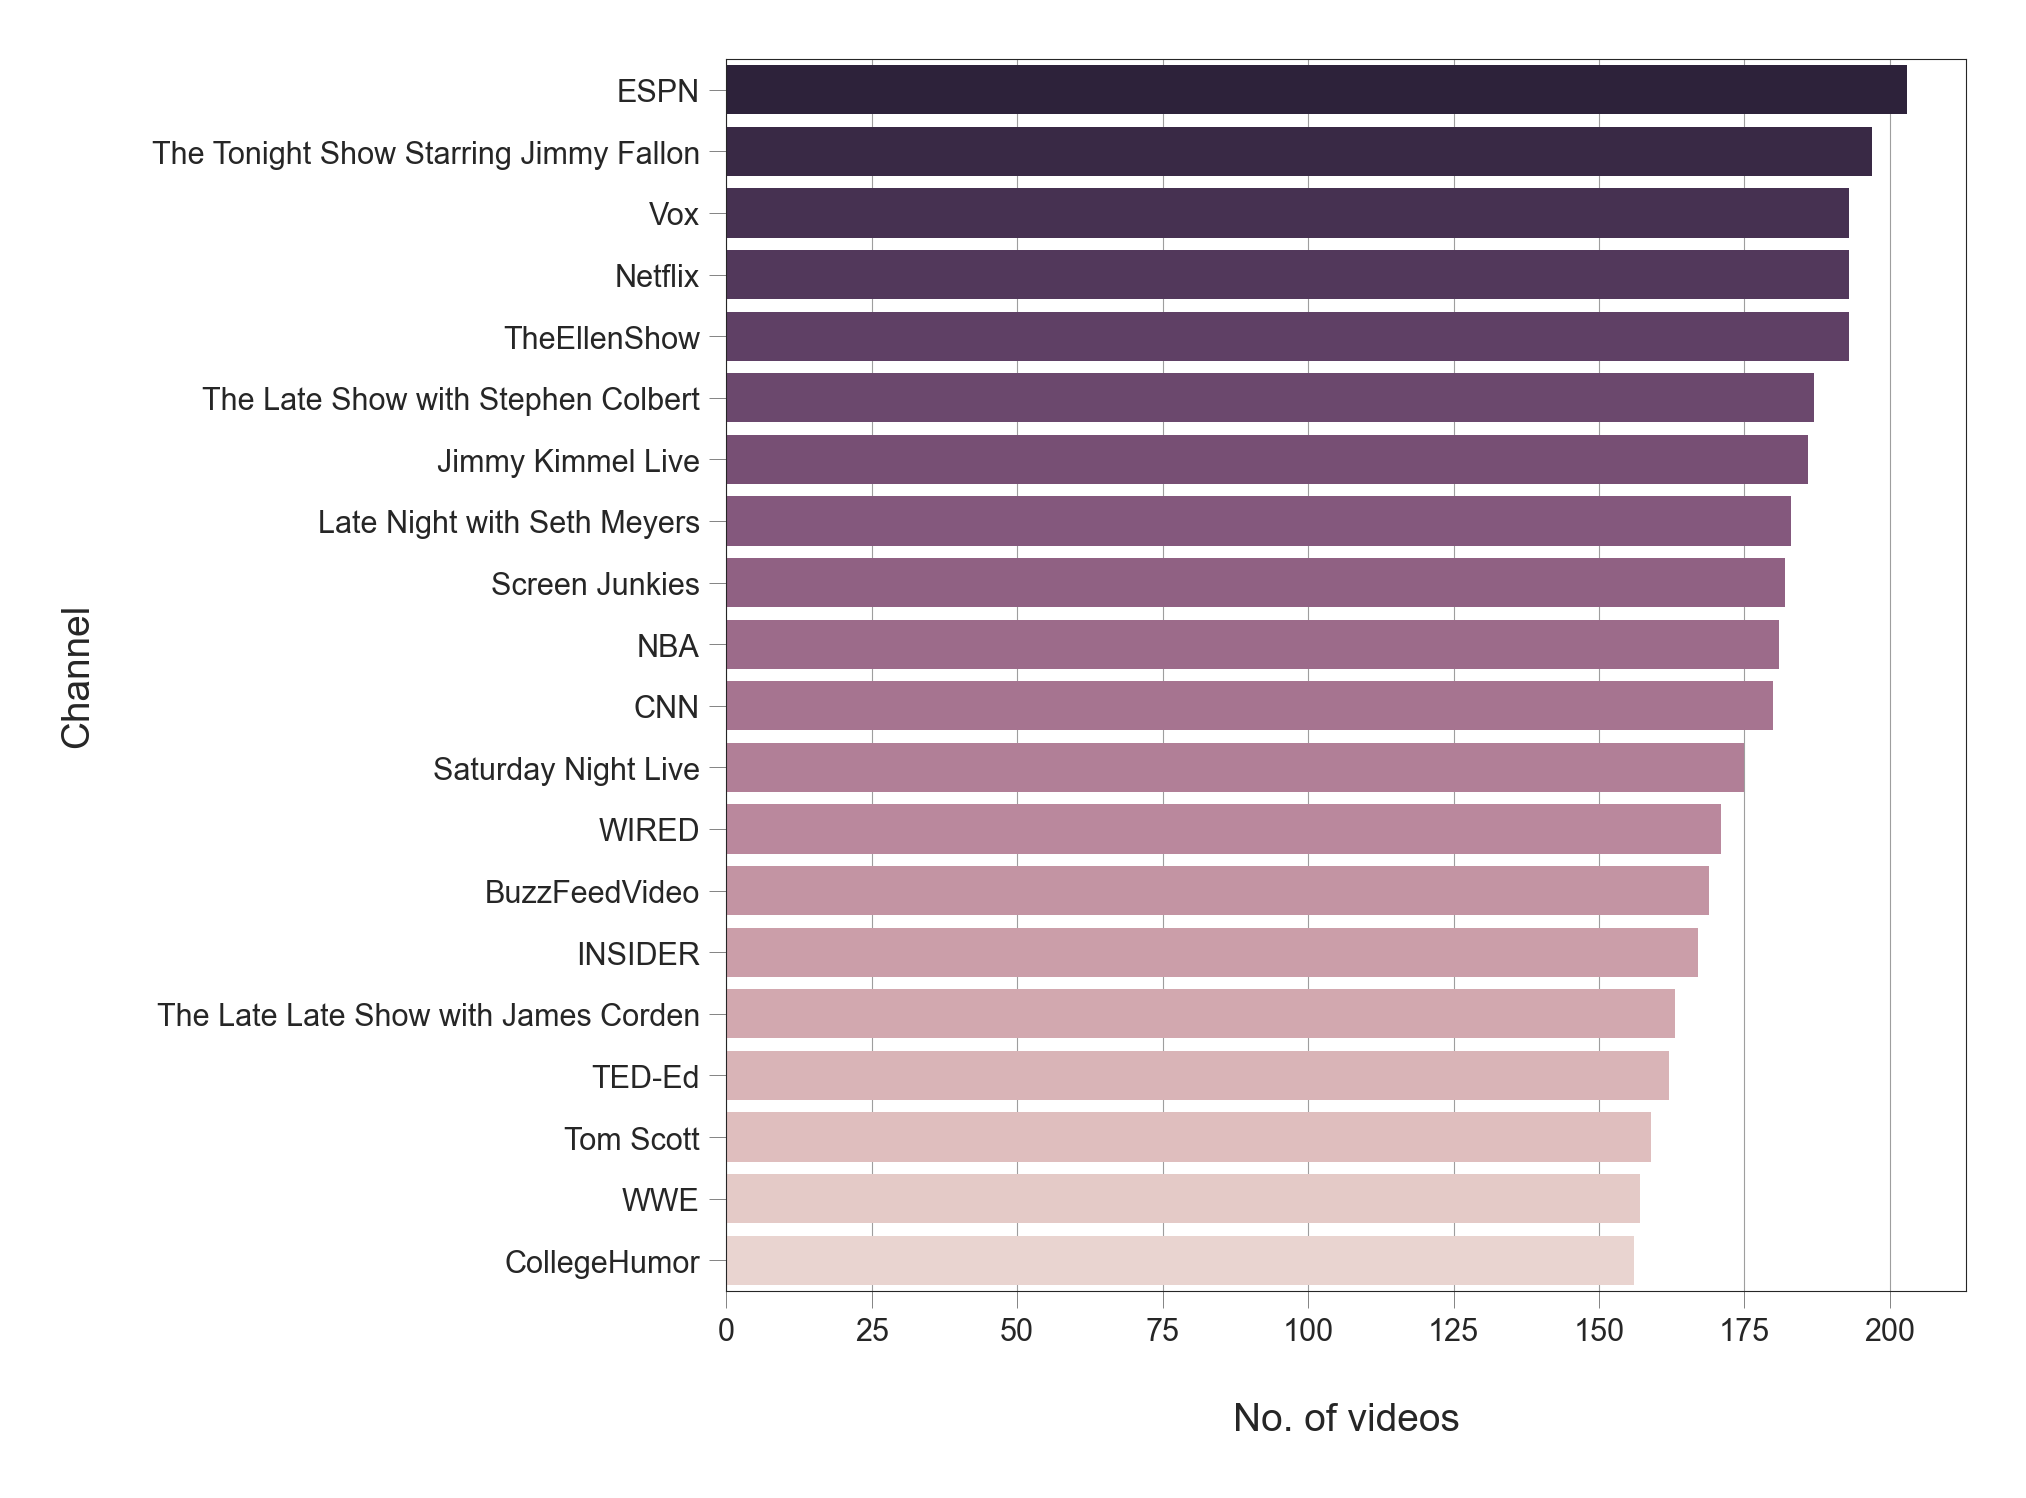

In [43]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Which video category has the largest number of trending videos?


The code reads a JSON file containing information about YouTube video categories, extracts the category names and maps them to their respective category IDs. It then creates a new column in the dataframe "df" called "category_name" and assigns the corresponding category names based on the category IDs present in the "category_id" column.






In [44]:
with open("data/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

The code calculates the count of videos in each category of the dataframe "df" and stores the results in a new dataframe called "cdf." It then creates a bar plot using seaborn to visualize the number of videos in each category, with the x-axis representing the category names and the y-axis representing the count of videos. The bar colors are defined using a cubehelix palette in reverse order. The x-axis labels are rotated by 90 degrees for better readability.






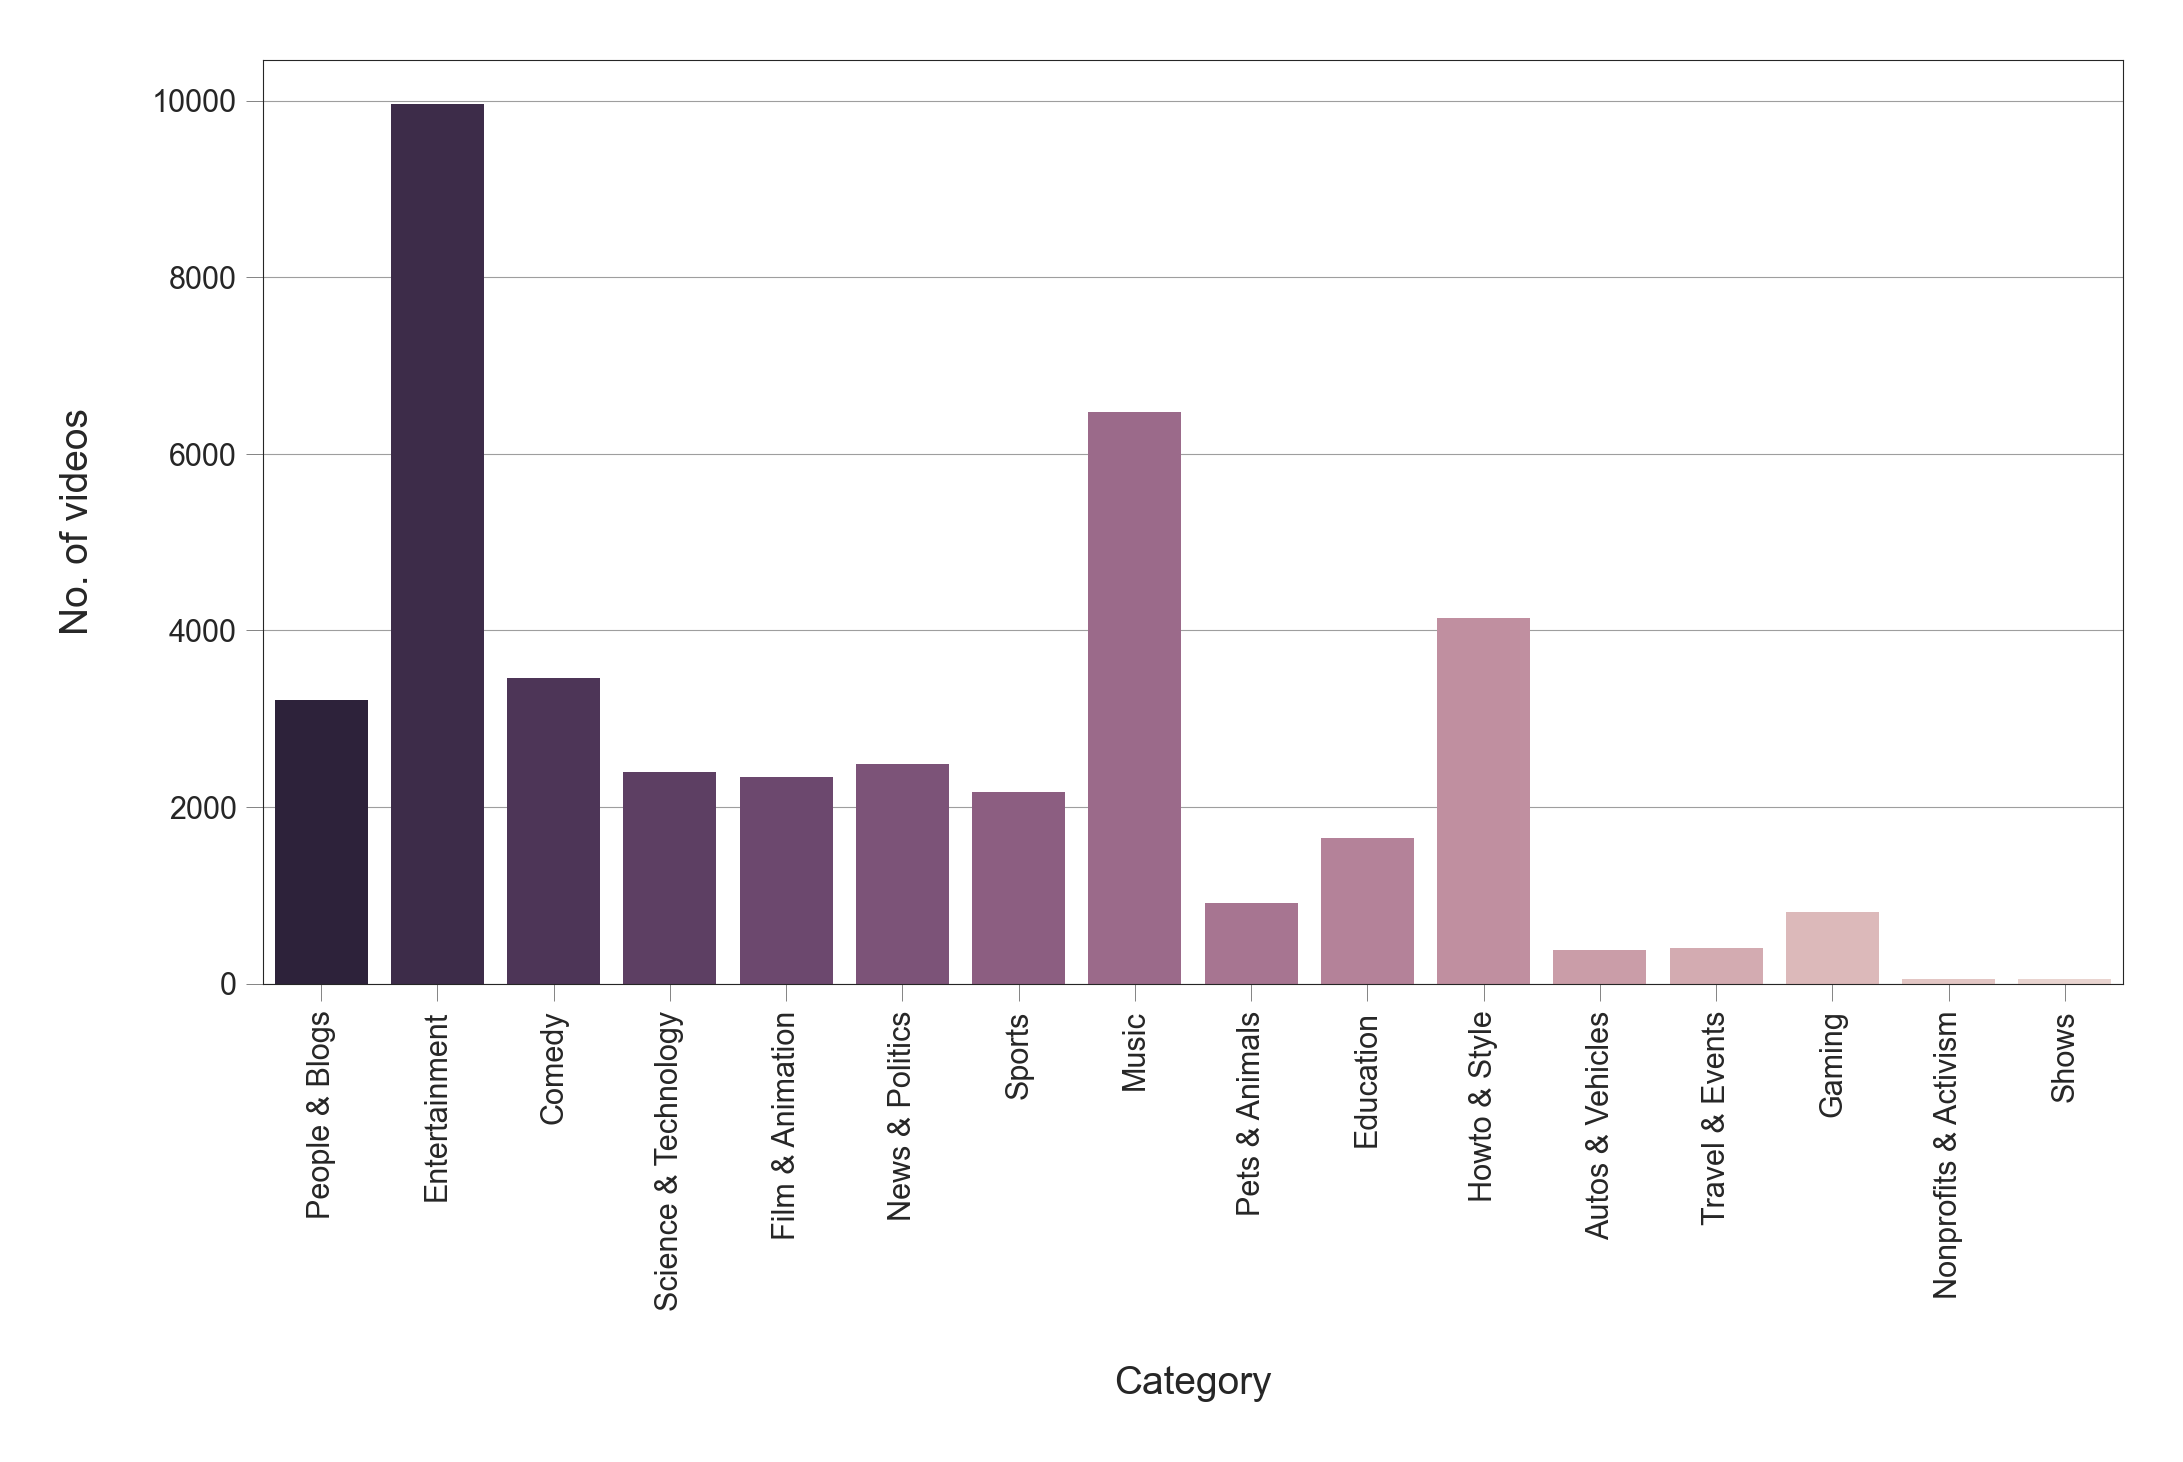

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.countplot(x="category_name", data=df,
                  palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

plt.show()


## <a name="pub"></a>Trending videos and their publishing time
The code extracts the publishing day and hour from the "publish_time" column in the dataframe "df" and assigns the values to new columns called "publishing_day" and "publishing_hour," respectively. It then removes the "publish_time" column from the dataframe.






In [48]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

The code calculates the count of videos published on each day of the week in the dataframe "df" and stores the results in a new dataframe called "cdf." It then creates a bar plot using seaborn to visualize the number of videos published on each day, with the x-axis representing the publishing days and the y-axis representing the count of videos. The bar colors are manually defined using a custom color palette.






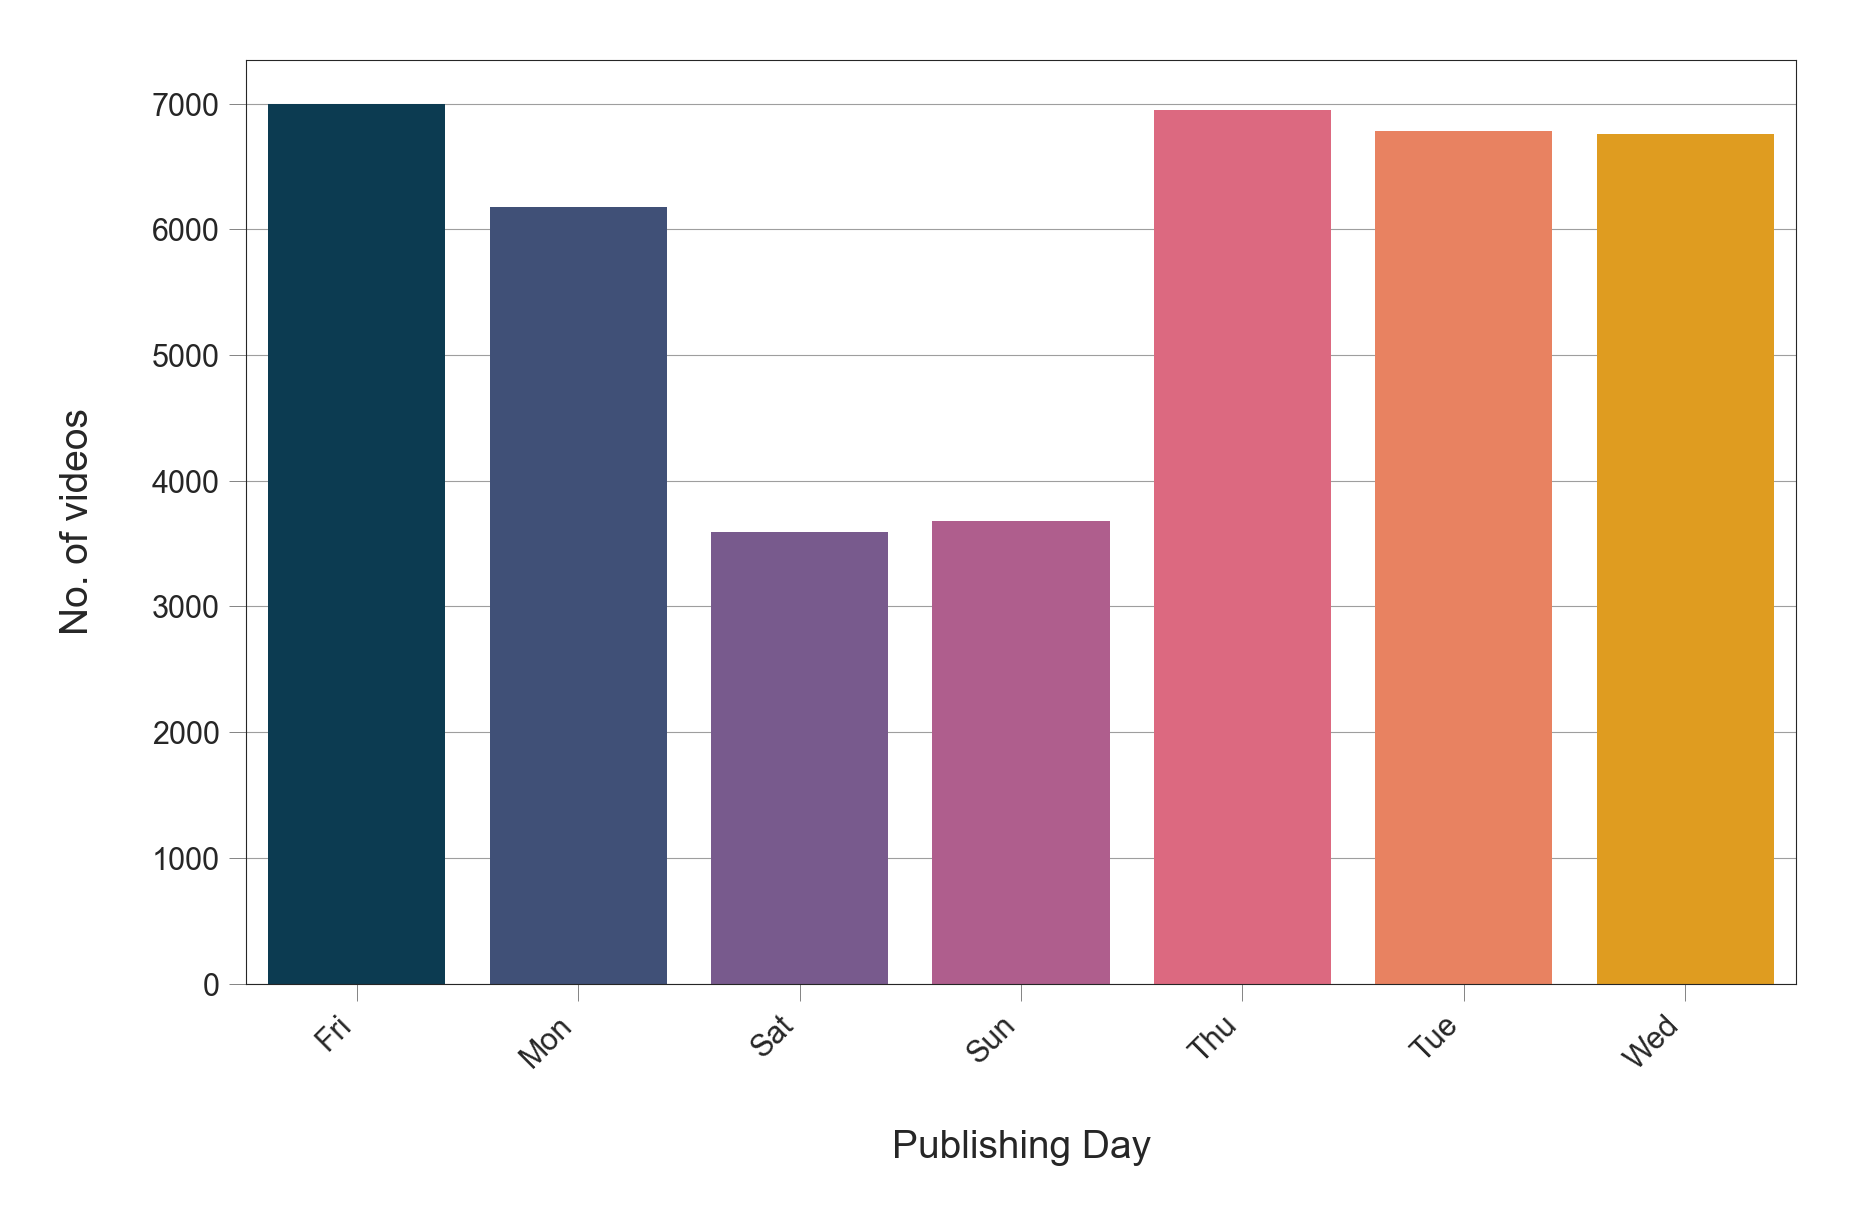

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Convert "publishing_day" to category type if needed
df["publishing_day"] = df["publishing_day"].astype("category")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.countplot(x="publishing_day", data=df,
                  palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195',
                                             '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()


The code calculates the count of videos published during each hour of the day in the dataframe "df" and stores the results in a new dataframe called "cdf." It then creates a bar plot using seaborn to visualize the number of videos published during each hour, with the x-axis representing the publishing hours and the y-axis representing the count of videos. The bar colors are defined using a cubehelix palette with 24 colors.






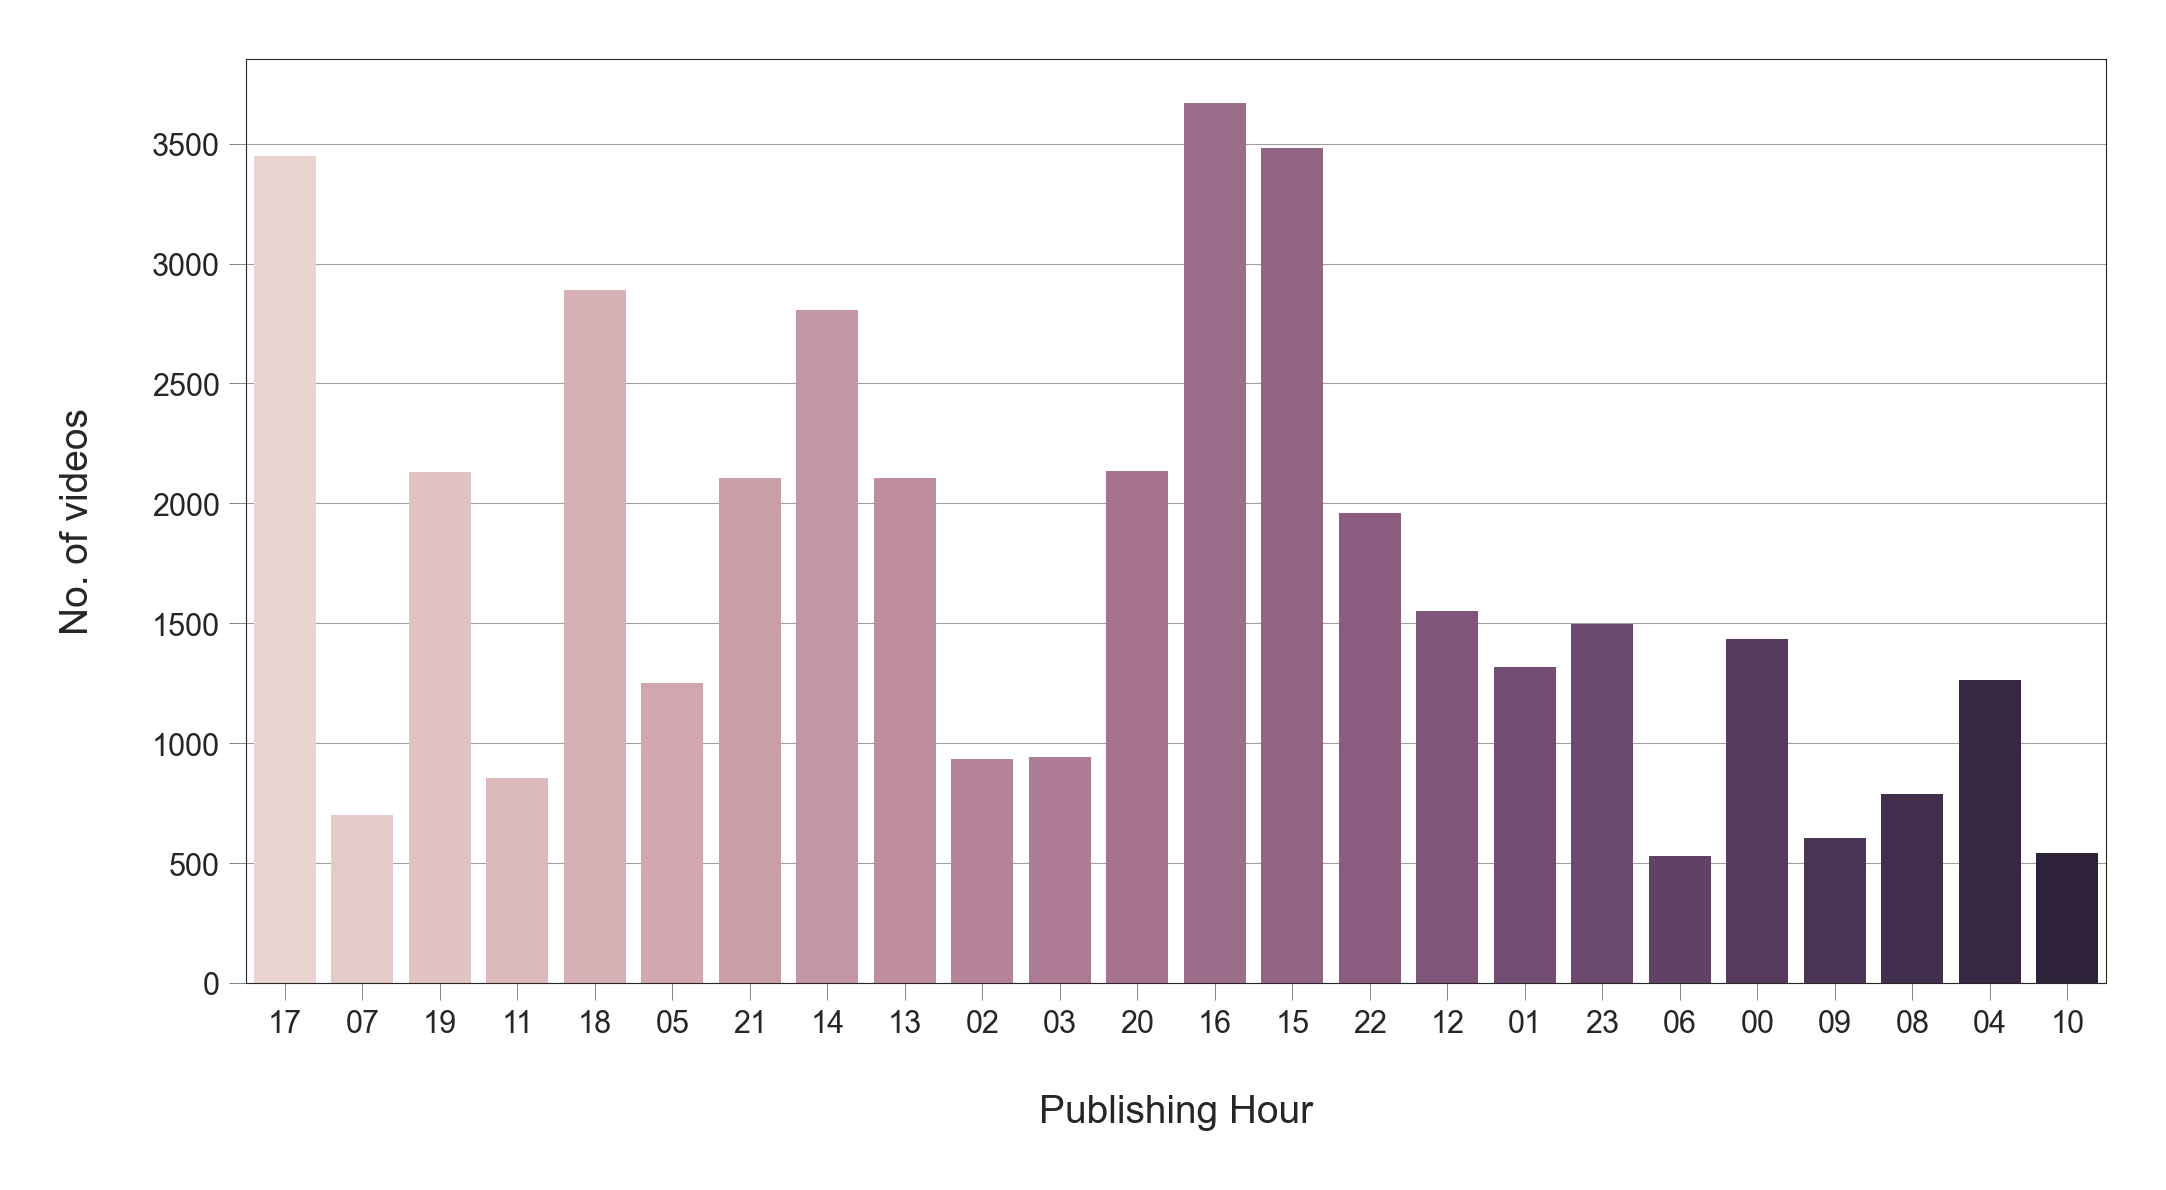

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.countplot(x="publishing_hour", data=df,
                  palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

plt.show()


## <a name="err"></a>How many trending videos have an error?
The code calculates the count of videos that are either error-free or removed in the dataframe "df" and stores the results in a dictionary called "value_counts." It then creates a pie chart using matplotlib to visualize the distribution of error-free and removed videos, with the corresponding labels, colors, and text color specified. The chart is made to appear circular with ax.axis('equal'), and a title "Video Error or Removed?" is set for the chart.






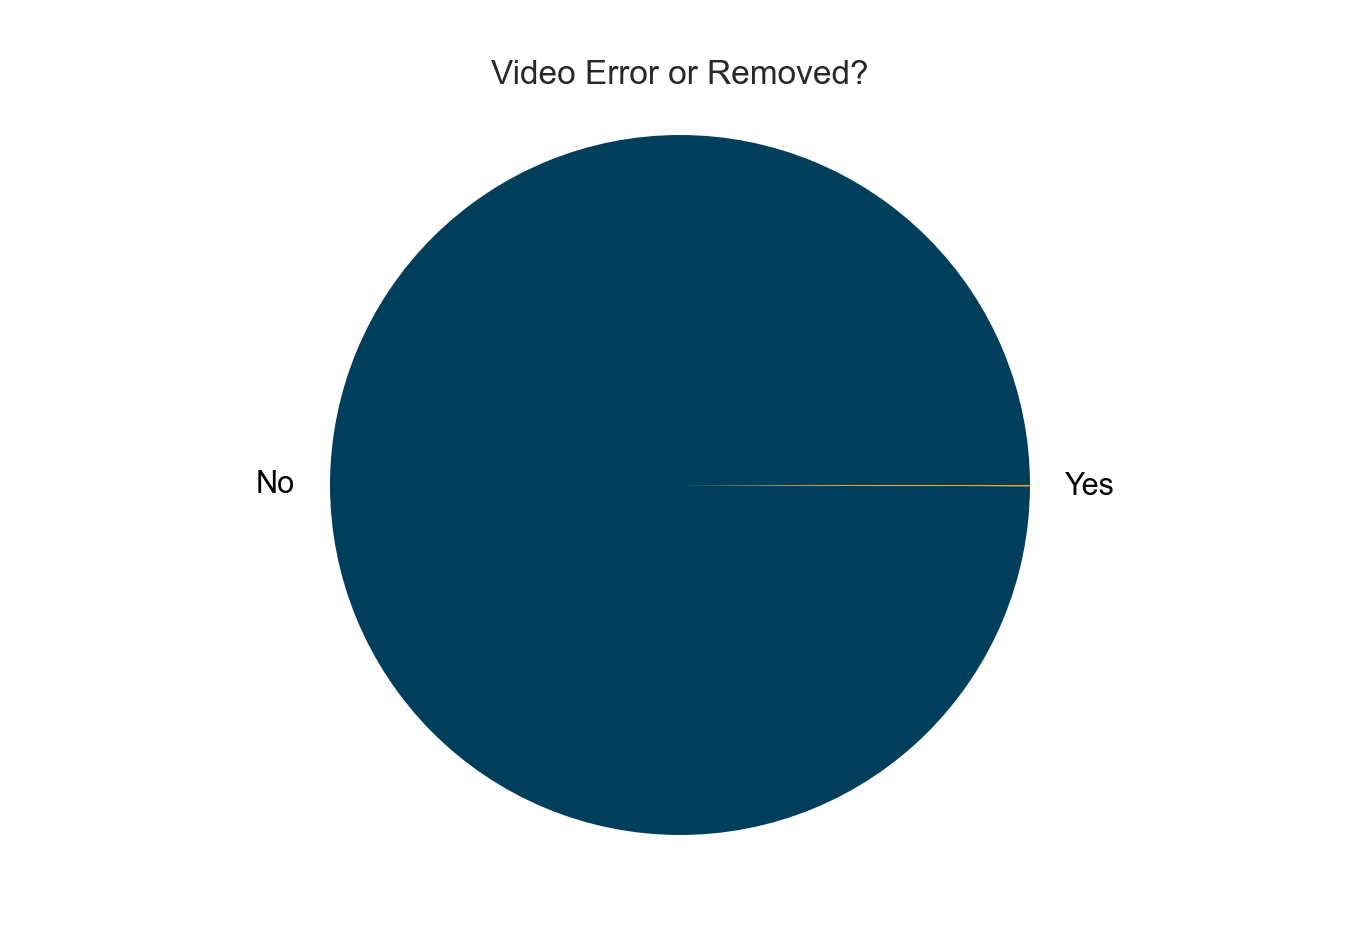

In [54]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

The code counts the occurrences of each unique value in the "video_error_or_removed" column of the dataframe "df," providing the number of videos that are either error-free or removed.






In [55]:
df["video_error_or_removed"].value_counts()

video_error_or_removed
False    40926
True        23
Name: count, dtype: int64

## <a name="commdis"></a>How many trending videos have their commets disabled?
The code calculates the count of videos with comments disabled and enabled in the dataframe "df" and stores the results in a dictionary called "value_counts." It then creates a pie chart using matplotlib to visualize the distribution of videos with disabled and enabled comments, with corresponding labels, colors, and text color specified. The chart is made to appear circular with ax.axis('equal'), and a title "Comments Disabled?" is set for the chart.






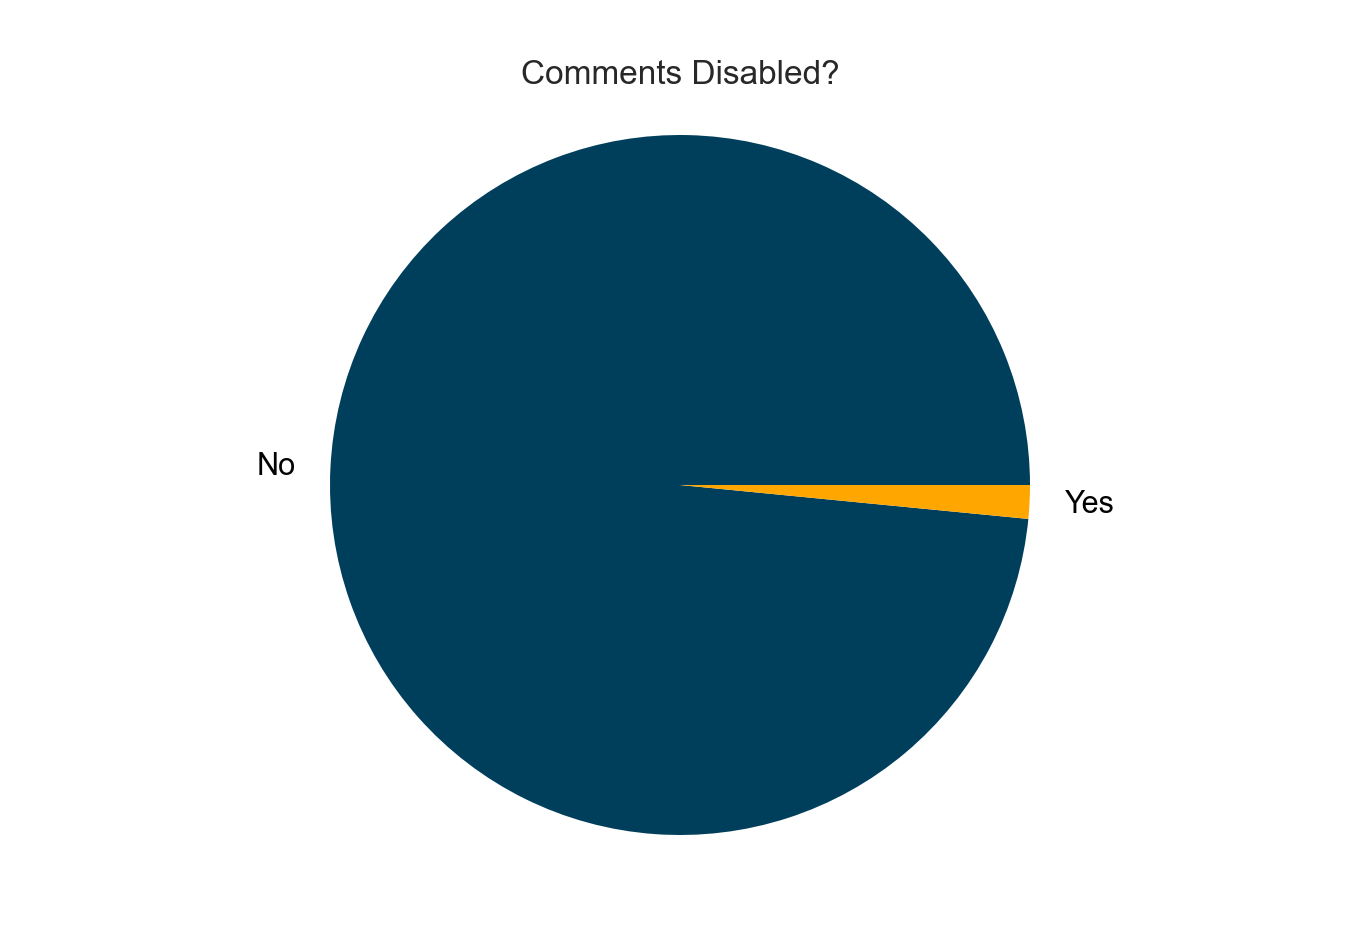

In [56]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

The code calculates the proportion of videos with comments disabled and enabled in the dataframe "df" by applying the value_counts function with the normalize parameter set to True. It provides the relative frequencies or percentages of videos with disabled and enabled comments.






In [57]:
df["comments_disabled"].value_counts(normalize=True)

comments_disabled
False   0.98
True    0.02
Name: proportion, dtype: float64

## <a name="ratdis"></a>How many trending videos have their ratings disabled?


The code calculates the count of videos with ratings disabled and enabled in the dataframe "df" and stores the results in a dictionary called "value_counts." It then creates a pie chart using matplotlib to visualize the distribution of videos with disabled and enabled ratings, with corresponding labels, colors, and text color specified. The chart is made to appear circular with ax.axis('equal'), and a title "Ratings Disabled?" is set for the chart.






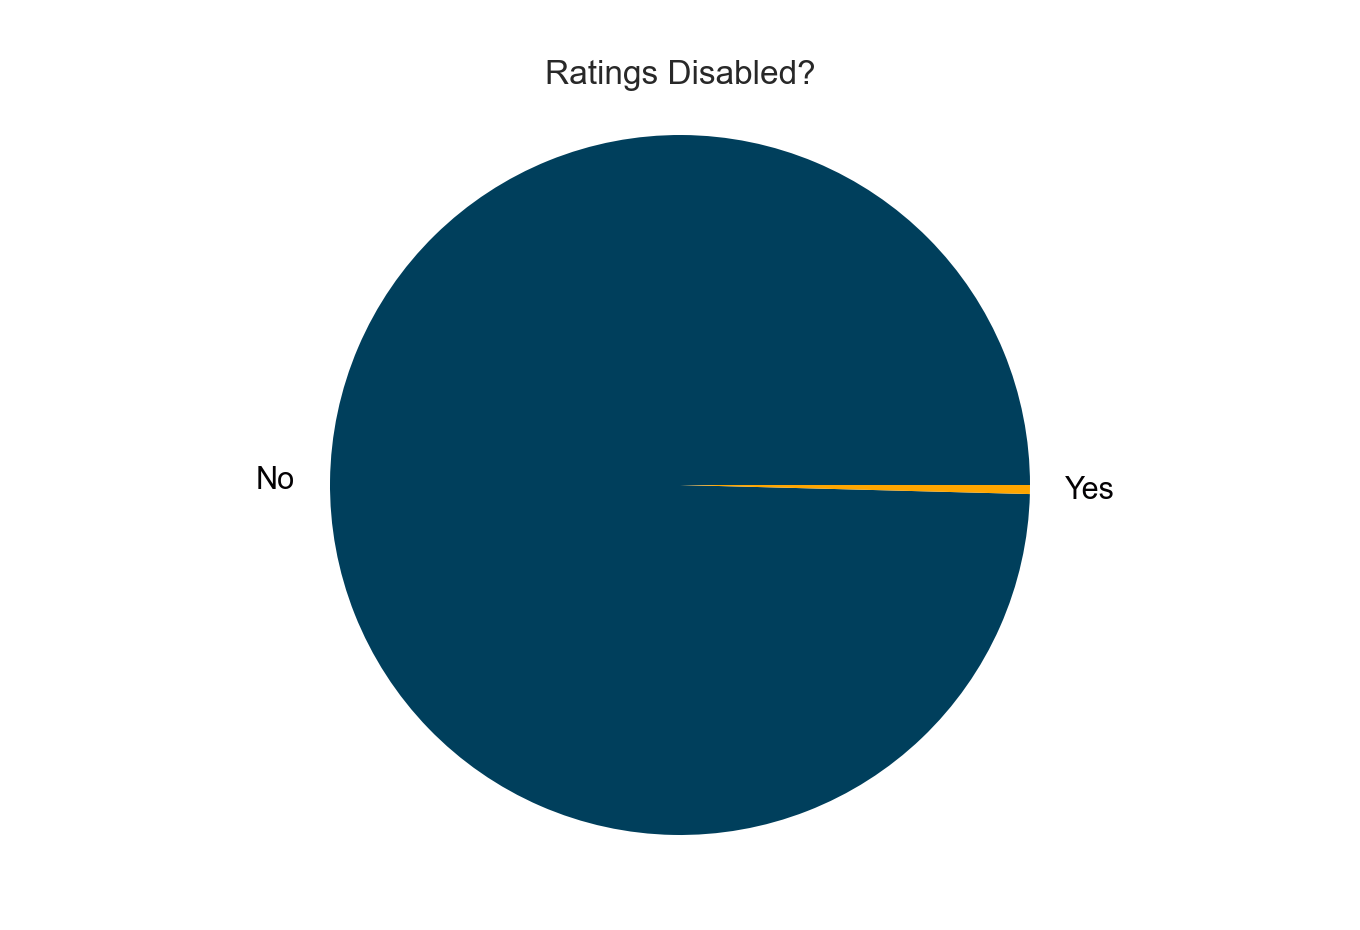

In [58]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

The code calculates the number of rows in the dataframe "df" where both the "comments_disabled" and "ratings_disabled" columns have a value of True, indicating videos with both comments and ratings disabled.






In [59]:
df["ratings_disabled"].value_counts()

ratings_disabled
False    40780
True       169
Name: count, dtype: int64


## <a name="commratdis"></a>How many videos have both comments and ratings disabled?

In [60]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

## <a name="conc"></a>Conclusions
* Examined a dataset comprising information on YouTube trending videos over a span of 205 days between 2017 and 2018. The dataset contains 40,949 video entries.
* Approximately 71% of trending videos have fewer than 1.5 million views, and 91% have fewer than 5 million views.
* About 68% of trending videos have fewer than 40,000 likes, and 84% have fewer than 100,000 likes.
* Around 67% of trending videos have fewer than 4,000 comments, and 93% have fewer than 25,000 comments.
* Some videos appear on the trending list on multiple days, resulting in 40,494 entries but only 6,351 unique videos.
* Trending videos with 100 million views or more typically have titles that are approximately 33 to 55 characters long.
The hyphen (-) and pipe (|) are commonly used delimiters in trending video titles.
* Popular words in trending video titles include "Official," "Video," "Trailer," "How," and "2018."
* There is a strong positive correlation between the number of views and likes for trending videos, meaning that as one increases, the other tends to increase as well.
* There is also a strong positive correlation between likes and comments, and a slightly weaker correlation between dislikes and comments.
* The category with the highest number of trending videos is "Entertainment" with 9,964 videos, followed by "Music" with 6,472 videos, and "Howto & Style" with 4,146 videos.
* Conversely, the categories with the fewest trending videos are "Shows" and "Nonprofits & Activism," each with 57 videos, followed by "Autos & Vehicles" with 384 videos.
